# TSLA Price Prediction

## 1. Introduction

### Description

### Importing Libraries

In [172]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV#, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
%matplotlib inline

#from datetime import date

In [173]:
warnings.filterwarnings('ignore') # To ignore the warning messages

pd.set_option('display.max_rows',380) # Preference

### Reading Data and Checking Data Characteristics

In [174]:
# Read data into data frames
df = pd.read_csv('/Users/johnvincent/Desktop/usd_ADS/github/ADS-505-Group6-2023/TSLA_preprocessed.csv')


In [175]:
df.head()

Date   Open_TSLA   High_TSLA    Low_TSLA  Close_TSLA  Adj_Close_TSLA  \
0  3/11/22  280.066681  281.266663  264.589996  265.116669      265.116669   
1  3/14/22  260.203339  266.899994  252.013336  255.456665      255.456665   
2  3/15/22  258.423340  268.523346  252.190002  267.296661      267.296661   
3  3/16/22  269.666656  280.666656  267.420013  280.076660      280.076660   
4  3/17/22  276.996674  291.666656  275.239990  290.533325      290.533325   

   Volume_TSLA  EPS_qtr      Revenue  oper_cash_fl  gross_mrgn  oper_mrgn  \
0     67037100     0.68  17719000000    4585000000      0.2528     0.1212   
1     71152200     0.68  17719000000    4585000000      0.2528     0.1212   
2     66841200     0.68  17719000000    4585000000      0.2528     0.1212   
3     84028800     0.68  17719000000    4585000000      0.2528     0.1212   
4     66582900     0.68  17719000000    4585000000      0.2528     0.1212   

   net_mrgn      pe_ann      pe_qtr  fed_funds_rate     Open_NDQ     High_NDQ  \
0    0.1026   97.469364  389.877454          0.0025  13229.76953  13239.34961   
1    0.1026   93.917892  375.671566          0.0025  12795.12012  12918.00977   
2    0.1026   98.270831  393.083325          0.0025  12685.23047  12973.87988   
3    0.1026  102.969360  411.877441          0.0050  13119.37012  13440.12012   
4    0.1026  106.813722  427.254890          0.0050  13360.71973  13620.79981   

       Low_NDQ    Close_NDQ  Adj Close_NDQ  Volume_NDQ     Open_SPX  \
0  12830.37012  12843.80957    12843.80957  5288210000  4279.500000   
1  12555.34961  12581.21973    12581.21973  5876710000  4202.750000   
2  12616.58984  12948.62012    12948.62012  5440100000  4188.819824   
3  12992.20020  13436.54981    13436.54981  6552210000  4288.140137   
4  13317.13965  13614.78027    13614.78027  5612090000  4345.109863   

      High_SPX      Low_SPX    Close_SPX  Adj_Close_SPX  Volume_SPX  
0  4291.009766  4200.490234  4204.310059    4204.310059  4938640000  
1  4247.569824  4161.720215  4173.109863    4173.109863  5574920000  
2  4271.049805  4187.899902  4262.450195    4262.450195  5392470000  
3  4358.899902  4251.990234  4357.859863    4357.859863  6309750000  
4  4412.669922  4335.649902  4411.669922    4411.669922  4985090000

In [176]:
df['Date'] = pd.to_datetime(df['Date']) #convert to datetime64 data type
df['Date']

0     2022-03-11
1     2022-03-14
2     2022-03-15
3     2022-03-16
4     2022-03-17
5     2022-03-18
6     2022-03-21
7     2022-03-22
8     2022-03-23
9     2022-03-24
10    2022-03-25
11    2022-03-28
12    2022-03-29
13    2022-03-30
14    2022-03-31
15    2022-04-01
16    2022-04-04
17    2022-04-05
18    2022-04-06
19    2022-04-07
20    2022-04-08
21    2022-04-11
22    2022-04-12
23    2022-04-13
24    2022-04-14
25    2022-04-18
26    2022-04-19
27    2022-04-20
28    2022-04-21
29    2022-04-22
30    2022-04-25
31    2022-04-26
32    2022-04-27
33    2022-04-28
34    2022-04-29
35    2022-05-02
36    2022-05-03
37    2022-05-04
38    2022-05-05
39    2022-05-06
40    2022-05-09
41    2022-05-10
42    2022-05-11
43    2022-05-12
44    2022-05-13
45    2022-05-16
46    2022-05-17
47    2022-05-18
48    2022-05-19
49    2022-05-20
50    2022-05-23
51    2022-05-24
52    2022-05-25
53    2022-05-26
54    2022-05-27
55    2022-05-31
56    2022-06-01
57    2022-06-02
58    2022-06-

## Add column for day of the week
### '0' is 'Monday' and '4' is 'Friday'. There should be no '5' or '6' due to market close.
#### Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

In [177]:
df.insert(1, 'day_week', df['Date'].dt.dayofweek)
df

Date  day_week   Open_TSLA   High_TSLA    Low_TSLA  Close_TSLA  \
0   2022-03-11         4  280.066681  281.266663  264.589996  265.116669   
1   2022-03-14         0  260.203339  266.899994  252.013336  255.456665   
2   2022-03-15         1  258.423340  268.523346  252.190002  267.296661   
3   2022-03-16         2  269.666656  280.666656  267.420013  280.076660   
4   2022-03-17         3  276.996674  291.666656  275.239990  290.533325   
5   2022-03-18         4  291.496674  302.616669  289.130005  301.796661   
6   2022-03-21         0  304.993347  314.283325  302.363342  307.053345   
7   2022-03-22         1  310.000000  332.619995  307.250000  331.326660   
8   2022-03-23         2  326.646667  346.899994  325.466675  333.036682   
9   2022-03-24         3  336.576660  341.496674  329.600006  337.973328   
10  2022-03-25         4  336.000000  340.600006  332.440002  336.880005   
11  2022-03-28         0  355.033325  365.959991  351.200012  363.946655   
12  2022-03-29         1  369.329987  371.589996  357.703339  366.523346   
13  2022-03-30         2  363.723328  371.316681  361.333344  364.663330   
14  2022-03-31         3  364.856659  367.713318  358.880005  359.200012   
15  2022-04-01         4  360.383331  364.916656  355.546661  361.529999   
16  2022-04-04         0  363.126678  383.303345  357.510010  381.816681   
17  2022-04-05         1  378.766663  384.290009  362.433319  363.753326   
18  2022-04-06         2  357.823334  359.666656  342.566681  348.586670   
19  2022-04-07         3  350.796661  358.863342  340.513336  352.420013   
20  2022-04-08         4  347.736664  349.480011  340.813324  341.829987   
21  2022-04-11         0  326.799988  336.156677  324.880005  325.309998   
22  2022-04-12         1  332.546661  340.396667  325.533325  328.983337   
23  2022-04-13         2  327.026672  342.079987  324.366669  340.790009   
24  2022-04-14         3  333.096680  337.570007  327.396667  328.333344   
25  2022-04-18         0  329.676666  338.306671  324.470001  334.763336   
26  2022-04-19         1  335.019989  344.980011  331.776672  342.716675   
27  2022-04-20         2  343.333344  344.666656  325.083344  325.733337   
28  2022-04-21         3  358.243347  364.073334  332.140015  336.260010   
29  2022-04-22         4  338.303345  344.950012  331.333344  335.016663   
30  2022-04-25         0  326.323334  336.206665  325.100006  332.673340   
31  2022-04-26         1  331.809998  333.333344  291.666656  292.140015   
32  2022-04-27         2  299.526672  306.000000  292.453339  293.836670   
33  2022-04-28         3  299.993347  300.000000  273.899994  292.503326   
34  2022-04-29         4  300.750000  311.466675  290.000000  290.253326   
35  2022-05-02         0  286.923340  302.119995  282.676666  300.980011   
36  2022-05-03         1  301.059998  308.026672  296.196655  303.083344   
37  2022-05-04         2  301.313324  318.500000  295.093323  317.540009   
38  2022-05-05         3  313.006653  315.200012  285.899994  291.093323   
39  2022-05-06         4  295.666656  296.000000  281.036682  288.549988   
40  2022-05-09         0  278.816681  281.876678  260.383331  262.369995   
41  2022-05-10         1  273.103333  275.119995  258.083344  266.679993   
42  2022-05-11         2  265.000000  269.923340  242.399994  244.666672   
43  2022-05-12         3  233.666672  253.220001  226.666672  242.666672   
44  2022-05-13         4  257.826660  262.450012  250.523331  256.529999   
45  2022-05-16         0  255.720001  256.586670  239.696671  241.456665   
46  2022-05-17         1  249.119995  254.826660  242.949997  253.869995   
47  2022-05-18         2  248.173340  253.500000  233.603333  236.603333   
48  2022-05-19         3  235.666672  244.666672  231.369995  236.473328   
49  2022-05-20         4  237.996674  240.526672  211.000000  221.300003   
50  2022-05-23         0  218.339996  226.653336  212.686661  224.966660   
51  2022-05-24         1  217.843338  217.973328  206.8566

## Add column on the difference between open and close TSLA price

In [178]:
df.insert(7, 'open_close_TSLA', df.iloc[df.index]['Close_TSLA'] - df.iloc[df.index]['Open_TSLA'])
df

Date  day_week   Open_TSLA   High_TSLA    Low_TSLA  Close_TSLA  \
0   2022-03-11         4  280.066681  281.266663  264.589996  265.116669   
1   2022-03-14         0  260.203339  266.899994  252.013336  255.456665   
2   2022-03-15         1  258.423340  268.523346  252.190002  267.296661   
3   2022-03-16         2  269.666656  280.666656  267.420013  280.076660   
4   2022-03-17         3  276.996674  291.666656  275.239990  290.533325   
5   2022-03-18         4  291.496674  302.616669  289.130005  301.796661   
6   2022-03-21         0  304.993347  314.283325  302.363342  307.053345   
7   2022-03-22         1  310.000000  332.619995  307.250000  331.326660   
8   2022-03-23         2  326.646667  346.899994  325.466675  333.036682   
9   2022-03-24         3  336.576660  341.496674  329.600006  337.973328   
10  2022-03-25         4  336.000000  340.600006  332.440002  336.880005   
11  2022-03-28         0  355.033325  365.959991  351.200012  363.946655   
12  2022-03-29         1  369.329987  371.589996  357.703339  366.523346   
13  2022-03-30         2  363.723328  371.316681  361.333344  364.663330   
14  2022-03-31         3  364.856659  367.713318  358.880005  359.200012   
15  2022-04-01         4  360.383331  364.916656  355.546661  361.529999   
16  2022-04-04         0  363.126678  383.303345  357.510010  381.816681   
17  2022-04-05         1  378.766663  384.290009  362.433319  363.753326   
18  2022-04-06         2  357.823334  359.666656  342.566681  348.586670   
19  2022-04-07         3  350.796661  358.863342  340.513336  352.420013   
20  2022-04-08         4  347.736664  349.480011  340.813324  341.829987   
21  2022-04-11         0  326.799988  336.156677  324.880005  325.309998   
22  2022-04-12         1  332.546661  340.396667  325.533325  328.983337   
23  2022-04-13         2  327.026672  342.079987  324.366669  340.790009   
24  2022-04-14         3  333.096680  337.570007  327.396667  328.333344   
25  2022-04-18         0  329.676666  338.306671  324.470001  334.763336   
26  2022-04-19         1  335.019989  344.980011  331.776672  342.716675   
27  2022-04-20         2  343.333344  344.666656  325.083344  325.733337   
28  2022-04-21         3  358.243347  364.073334  332.140015  336.260010   
29  2022-04-22         4  338.303345  344.950012  331.333344  335.016663   
30  2022-04-25         0  326.323334  336.206665  325.100006  332.673340   
31  2022-04-26         1  331.809998  333.333344  291.666656  292.140015   
32  2022-04-27         2  299.526672  306.000000  292.453339  293.836670   
33  2022-04-28         3  299.993347  300.000000  273.899994  292.503326   
34  2022-04-29         4  300.750000  311.466675  290.000000  290.253326   
35  2022-05-02         0  286.923340  302.119995  282.676666  300.980011   
36  2022-05-03         1  301.059998  308.026672  296.196655  303.083344   
37  2022-05-04         2  301.313324  318.500000  295.093323  317.540009   
38  2022-05-05         3  313.006653  315.200012  285.899994  291.093323   
39  2022-05-06         4  295.666656  296.000000  281.036682  288.549988   
40  2022-05-09         0  278.816681  281.876678  260.383331  262.369995   
41  2022-05-10         1  273.103333  275.119995  258.083344  266.679993   
42  2022-05-11         2  265.000000  269.923340  242.399994  244.666672   
43  2022-05-12         3  233.666672  253.220001  226.666672  242.666672   
44  2022-05-13         4  257.826660  262.450012  250.523331  256.529999   
45  2022-05-16         0  255.720001  256.586670  239.696671  241.456665   
46  2022-05-17         1  249.119995  254.826660  242.949997  253.869995   
47  2022-05-18         2  248.173340  253.500000  233.603333  236.603333   
48  2022-05-19         3  235.666672  244.666672  231.369995  236.473328   
49  2022-05-20         4  237.996674  240.526672  211.000000  221.300003   
50  2022-05-23         0  218.339996  226.653336  212.686661  224.966660   
51  2022-05-24         1  217.843338  217.973328  206.8566

## Add binary column if
### TSLA closed at or above opening price = 1
### TSLA closed below opening price = 0
#### For future use in logistic regression or classification purposes

In [179]:
df.insert(8, 'positive_TSLA', np.where(df['open_close_TSLA']>=0, 1, 0))
df

Date  day_week   Open_TSLA   High_TSLA    Low_TSLA  Close_TSLA  \
0   2022-03-11         4  280.066681  281.266663  264.589996  265.116669   
1   2022-03-14         0  260.203339  266.899994  252.013336  255.456665   
2   2022-03-15         1  258.423340  268.523346  252.190002  267.296661   
3   2022-03-16         2  269.666656  280.666656  267.420013  280.076660   
4   2022-03-17         3  276.996674  291.666656  275.239990  290.533325   
5   2022-03-18         4  291.496674  302.616669  289.130005  301.796661   
6   2022-03-21         0  304.993347  314.283325  302.363342  307.053345   
7   2022-03-22         1  310.000000  332.619995  307.250000  331.326660   
8   2022-03-23         2  326.646667  346.899994  325.466675  333.036682   
9   2022-03-24         3  336.576660  341.496674  329.600006  337.973328   
10  2022-03-25         4  336.000000  340.600006  332.440002  336.880005   
11  2022-03-28         0  355.033325  365.959991  351.200012  363.946655   
12  2022-03-29         1  369.329987  371.589996  357.703339  366.523346   
13  2022-03-30         2  363.723328  371.316681  361.333344  364.663330   
14  2022-03-31         3  364.856659  367.713318  358.880005  359.200012   
15  2022-04-01         4  360.383331  364.916656  355.546661  361.529999   
16  2022-04-04         0  363.126678  383.303345  357.510010  381.816681   
17  2022-04-05         1  378.766663  384.290009  362.433319  363.753326   
18  2022-04-06         2  357.823334  359.666656  342.566681  348.586670   
19  2022-04-07         3  350.796661  358.863342  340.513336  352.420013   
20  2022-04-08         4  347.736664  349.480011  340.813324  341.829987   
21  2022-04-11         0  326.799988  336.156677  324.880005  325.309998   
22  2022-04-12         1  332.546661  340.396667  325.533325  328.983337   
23  2022-04-13         2  327.026672  342.079987  324.366669  340.790009   
24  2022-04-14         3  333.096680  337.570007  327.396667  328.333344   
25  2022-04-18         0  329.676666  338.306671  324.470001  334.763336   
26  2022-04-19         1  335.019989  344.980011  331.776672  342.716675   
27  2022-04-20         2  343.333344  344.666656  325.083344  325.733337   
28  2022-04-21         3  358.243347  364.073334  332.140015  336.260010   
29  2022-04-22         4  338.303345  344.950012  331.333344  335.016663   
30  2022-04-25         0  326.323334  336.206665  325.100006  332.673340   
31  2022-04-26         1  331.809998  333.333344  291.666656  292.140015   
32  2022-04-27         2  299.526672  306.000000  292.453339  293.836670   
33  2022-04-28         3  299.993347  300.000000  273.899994  292.503326   
34  2022-04-29         4  300.750000  311.466675  290.000000  290.253326   
35  2022-05-02         0  286.923340  302.119995  282.676666  300.980011   
36  2022-05-03         1  301.059998  308.026672  296.196655  303.083344   
37  2022-05-04         2  301.313324  318.500000  295.093323  317.540009   
38  2022-05-05         3  313.006653  315.200012  285.899994  291.093323   
39  2022-05-06         4  295.666656  296.000000  281.036682  288.549988   
40  2022-05-09         0  278.816681  281.876678  260.383331  262.369995   
41  2022-05-10         1  273.103333  275.119995  258.083344  266.679993   
42  2022-05-11         2  265.000000  269.923340  242.399994  244.666672   
43  2022-05-12         3  233.666672  253.220001  226.666672  242.666672   
44  2022-05-13         4  257.826660  262.450012  250.523331  256.529999   
45  2022-05-16         0  255.720001  256.586670  239.696671  241.456665   
46  2022-05-17         1  249.119995  254.826660  242.949997  253.869995   
47  2022-05-18         2  248.173340  253.500000  233.603333  236.603333   
48  2022-05-19         3  235.666672  244.666672  231.369995  236.473328   
49  2022-05-20         4  237.996674  240.526672  211.000000  221.300003   
50  2022-05-23         0  218.339996  226.653336  212.686661  224.966660   
51  2022-05-24         1  217.843338  217.973328  206.8566

In [180]:
df.shape # Check the data dimension

(380, 31)

In [181]:
# Reference: chat.openai.com assisted as an initial starting point, which has since greatly evolved manually

df_z2 = df.copy()

depth_days = 3 # User-defined: Number of days deep to begin slicing the original dataframe

# Replicate column values for original row of dataframe as column values shifted in the same row
# Purpose: Trading space efficiency withing dataframe for simplicity of data access in a 2D dataframe
for i in range(1, depth_days+1):
    for col in df_z2.columns:
        lag_col_name = f'{col}_lag{i}'
        df_z2[lag_col_name] = df_z2[col].shift(i)

In [182]:
df.loc[depth_days] 

Date               2022-03-16 00:00:00
day_week                             2
Open_TSLA                   269.666656
High_TSLA                   280.666656
Low_TSLA                    267.420013
Close_TSLA                   280.07666
Adj_Close_TSLA               280.07666
open_close_TSLA              10.410004
positive_TSLA                        1
Volume_TSLA                   84028800
EPS_qtr                           0.68
Revenue                    17719000000
oper_cash_fl                4585000000
gross_mrgn                      0.2528
oper_mrgn                       0.1212
net_mrgn                        0.1026
pe_ann                       102.96936
pe_qtr                      411.877441
fed_funds_rate                   0.005
Open_NDQ                   13119.37012
High_NDQ                   13440.12012
Low_NDQ                     12992.2002
Close_NDQ                  13436.54981
Adj Close_NDQ              13436.54981
Volume_NDQ                  6552210000
Open_SPX                 

Date  day_week   Open_TSLA   High_TSLA    Low_TSLA  Close_TSLA  \
2 2022-03-15         1  258.423340  268.523346  252.190002  267.296661   
3 2022-03-16         2  269.666656  280.666656  267.420013  280.076660   
4 2022-03-17         3  276.996674  291.666656  275.239990  290.533325   

   Adj_Close_TSLA  open_close_TSLA  positive_TSLA  Volume_TSLA  EPS_qtr  \
2      267.296661         8.873321              1     66841200     0.68   
3      280.076660        10.410004              1     84028800     0.68   
4      290.533325        13.536651              1     66582900     0.68   

       Revenue  oper_cash_fl  gross_mrgn  oper_mrgn  net_mrgn      pe_ann  \
2  17719000000    4585000000      0.2528     0.1212    0.1026   98.270831   
3  17719000000    4585000000      0.2528     0.1212    0.1026  102.969360   
4  17719000000    4585000000      0.2528     0.1212    0.1026  106.813722   

       pe_qtr  fed_funds_rate     Open_NDQ     High_NDQ      Low_NDQ  \
2  393.083325          0.0025  12685.23047  12973.87988  12616.58984   
3  411.877441          0.0050  13119.37012  13440.12012  12992.20020   
4  427.254890          0.0050  13360.71973  13620.79981  13317.13965   

     Close_NDQ  Adj Close_NDQ  Volume_NDQ     Open_SPX     High_SPX  \
2  12948.62012    12948.62012  5440100000  4188.819824  4271.049805   
3  13436.54981    13436.54981  6552210000  4288.140137  4358.899902   
4  13614.78027    13614.78027  5612090000  4345.109863  4412.669922   

       Low_SPX    Close_SPX  Adj_Close_SPX  Volume_SPX  Date_lag1  \
2  4187.899902  4262.450195    4262.450195  5392470000 2022-03-14   
3  4251.990234  4357.859863    4357.859863  6309750000 2022-03-15   
4  4335.649902  4411.669922    4411.669922  4985090000 2022-03-16   

   day_week_lag1  Open_TSLA_lag1  High_TSLA_lag1  Low_TSLA_lag1  \
2            0.0      260.203339      266.899994     252.013336   
3            1.0      258.423340      268.523346     252.190002   
4            2.0      269.666656      280.666656     267.420013   

   Close_TSLA_lag1  Adj_Close_TSLA_lag1  open_close_TSLA_lag1  \
2       255.456665           255.456665             -4.746674   
3       267.296661           267.296661              8.873321   
4       280.076660           280.076660             10.410004   

   positive_TSLA_lag1  Volume_TSLA_lag1  EPS_qtr_lag1  Revenue_lag1  \
2                 0.0        71152200.0          0.68  1.771900e+10   
3                 1.0        66841200.0          0.68  1.771900e+10   
4                 1.0        84028800.0          0.68  1.771900e+10   

   oper_cash_fl_lag1  gross_mrgn_lag1  oper_mrgn_lag1  net_mrgn_lag1  \
2       4.585000e+09           0.2528          0.1212         0.1026   
3       4.585000e+09           0.2528          0.1212         0.1026   
4       4.585000e+09           0.2528          0.1212         0.1026   

   pe_ann_lag1  pe_qtr_lag1  fed_funds_rate_lag1  Open_NDQ_lag1  \
2    93.917892   375.671566               0.0025    12795.12012   
3    98.270831   393.083325               0.0025    12685.23047   
4   102.969360   411.877441               0.0050    13119.37012   

   High_NDQ_lag1  Low_NDQ_lag1  Close_NDQ_lag1  Adj Close_NDQ_lag1  \
2    12918.00977   12555.34961     12581.21973         12581.21973   
3    12973.87988   12616.58984     12948.62012         12948.62012   
4    13440.12012   12992.20020     13436.54981         13436.54981   

   Volume_NDQ_lag1  Open_SPX_lag1  High_SPX_lag1  Low_SPX_lag1  \
2     5.876710e+09    4202.750000    4247.569824   4161.720215   
3     5.440100e+09    4188.819824    4271.049805   4187.899902   
4     6.552210e+09    4288.140137    4358.899902   4251.990234   

   Close_SPX_lag1  Adj_Close_SPX_lag1  Volume_SPX_lag1  Date_lag2  \
2     4173.109863         4173.109863     5.574920e+09 2022-03-11   
3     4262.450195         4262.450195     5.392470e+09 2022-03-14   
4     4357.859863         4357.859863     6.309750e+09 2022-03-15   

   day_week_lag2  Open_TSLA_lag2  High_TSLA_lag2  Low_

In [184]:
df_z2.shape

(380, 248)

In [166]:
df.columns # Get attribute names

Index(['Date', 'day_week', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'open_close_TSLA', 'positive_TSLA', 'Volume_TSLA',
       'EPS_qtr', 'Revenue', 'oper_cash_fl', 'gross_mrgn', 'oper_mrgn',
       'net_mrgn', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ',
       'High_NDQ', 'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ',
       'Open_SPX', 'High_SPX', 'Low_SPX', 'Close_SPX', 'Adj_Close_SPX',
       'Volume_SPX'],
      dtype='object')

In [14]:
df.info() # Check data characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             380 non-null    datetime64[ns]
 1   day_week         380 non-null    int32         
 2   Open_TSLA        380 non-null    float64       
 3   High_TSLA        380 non-null    float64       
 4   Low_TSLA         380 non-null    float64       
 5   Close_TSLA       380 non-null    float64       
 6   Adj_Close_TSLA   380 non-null    float64       
 7   open_close_TSLA  380 non-null    float64       
 8   positive_TSLA    380 non-null    int64         
 9   Volume_TSLA      380 non-null    int64         
 10  EPS_qtr          380 non-null    float64       
 11  Revenue          380 non-null    int64         
 12  oper_cash_fl     380 non-null    int64         
 13  gross_mrgn       380 non-null    float64       
 14  oper_mrgn        380 non-null    float64  

## 2. Exploratory Data Analysis

### Checking Missing Values

In [15]:
df.isnull().sum() # Checking Null Values

Date               0
day_week           0
Open_TSLA          0
High_TSLA          0
Low_TSLA           0
Close_TSLA         0
Adj_Close_TSLA     0
open_close_TSLA    0
positive_TSLA      0
Volume_TSLA        0
EPS_qtr            0
Revenue            0
oper_cash_fl       0
gross_mrgn         0
oper_mrgn          0
net_mrgn           0
pe_ann             0
pe_qtr             0
fed_funds_rate     0
Open_NDQ           0
High_NDQ           0
Low_NDQ            0
Close_NDQ          0
Adj Close_NDQ      0
Volume_NDQ         0
Open_SPX           0
High_SPX           0
Low_SPX            0
Close_SPX          0
Adj_Close_SPX      0
Volume_SPX         0
dtype: int64

0 NaN values in the dataframe

### Checking duplicated Values

In [16]:
df.duplicated().sum()

0

0 duplicated values in the dataframe

### Understanding of price range categories

In [17]:
df.nunique() #check cardinality to see if variable type fits

Date               379
day_week             5
Open_TSLA          375
High_TSLA          373
Low_TSLA           375
Close_TSLA         377
Adj_Close_TSLA     377
open_close_TSLA    372
positive_TSLA        2
Volume_TSLA        379
EPS_qtr              6
Revenue              7
oper_cash_fl         7
gross_mrgn           6
oper_mrgn            7
net_mrgn             7
pe_ann             378
pe_qtr             378
fed_funds_rate      12
Open_NDQ           380
High_NDQ           380
Low_NDQ            380
Close_NDQ          380
Adj Close_NDQ      380
Volume_NDQ         380
Open_SPX           380
High_SPX           378
Low_SPX            379
Close_SPX          379
Adj_Close_SPX      379
Volume_SPX         380
dtype: int64

In [18]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
columns = ['Date', 'day_week', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'open_close_TSLA', 'positive_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
       'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #32 columns

tesla = ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA','open_close_TSLA', 'positive_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',] #16 columns

nasdaq = ['Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ'] #6 columns

spx = ['Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #6 columns

# Data Visualization: Analyzing the Relationship Between Variables

In [19]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 15-by-2 grid of subplots to display

# COMMENTING OUT ONLY TO SPEED ANALYSIS. UNCOMMENT FOR FINAL PRODUCT.

#fig, ax = plt.subplots(15,2, figsize=(50,50))

#target = 'Close_TSLA'

# FOR loop that iterates through each feature in the "columns" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
#for var, subplot in zip(columns, ax.flatten()):
#    sns.boxplot(x=var, y=target, data=df, ax=subplot)
#    plt.xticks(rotation=45)
#plt.show()

## Explore relationship between P/E ratio and US Federal Reserve Discount Rate

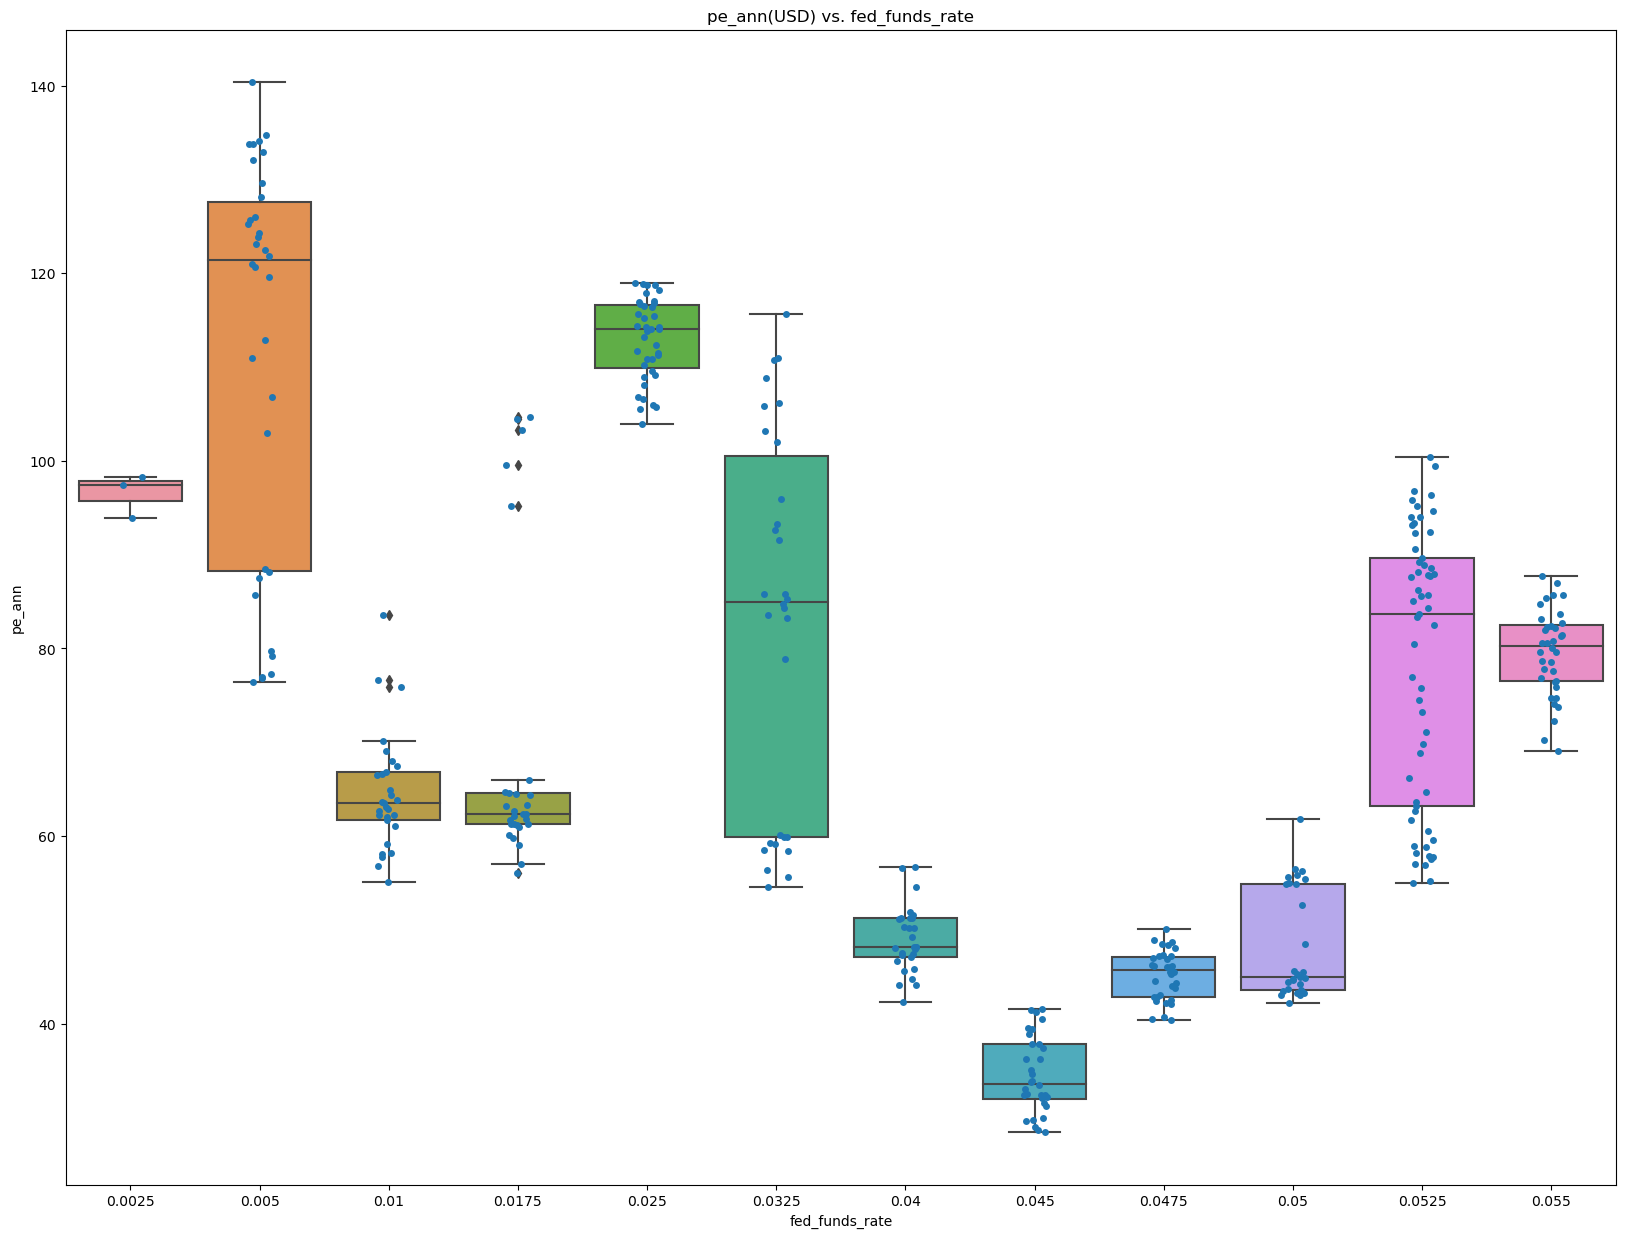

In [20]:
target_y = 'pe_ann'
column_x = 'fed_funds_rate'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

## Explore relationship between price and the day of the week

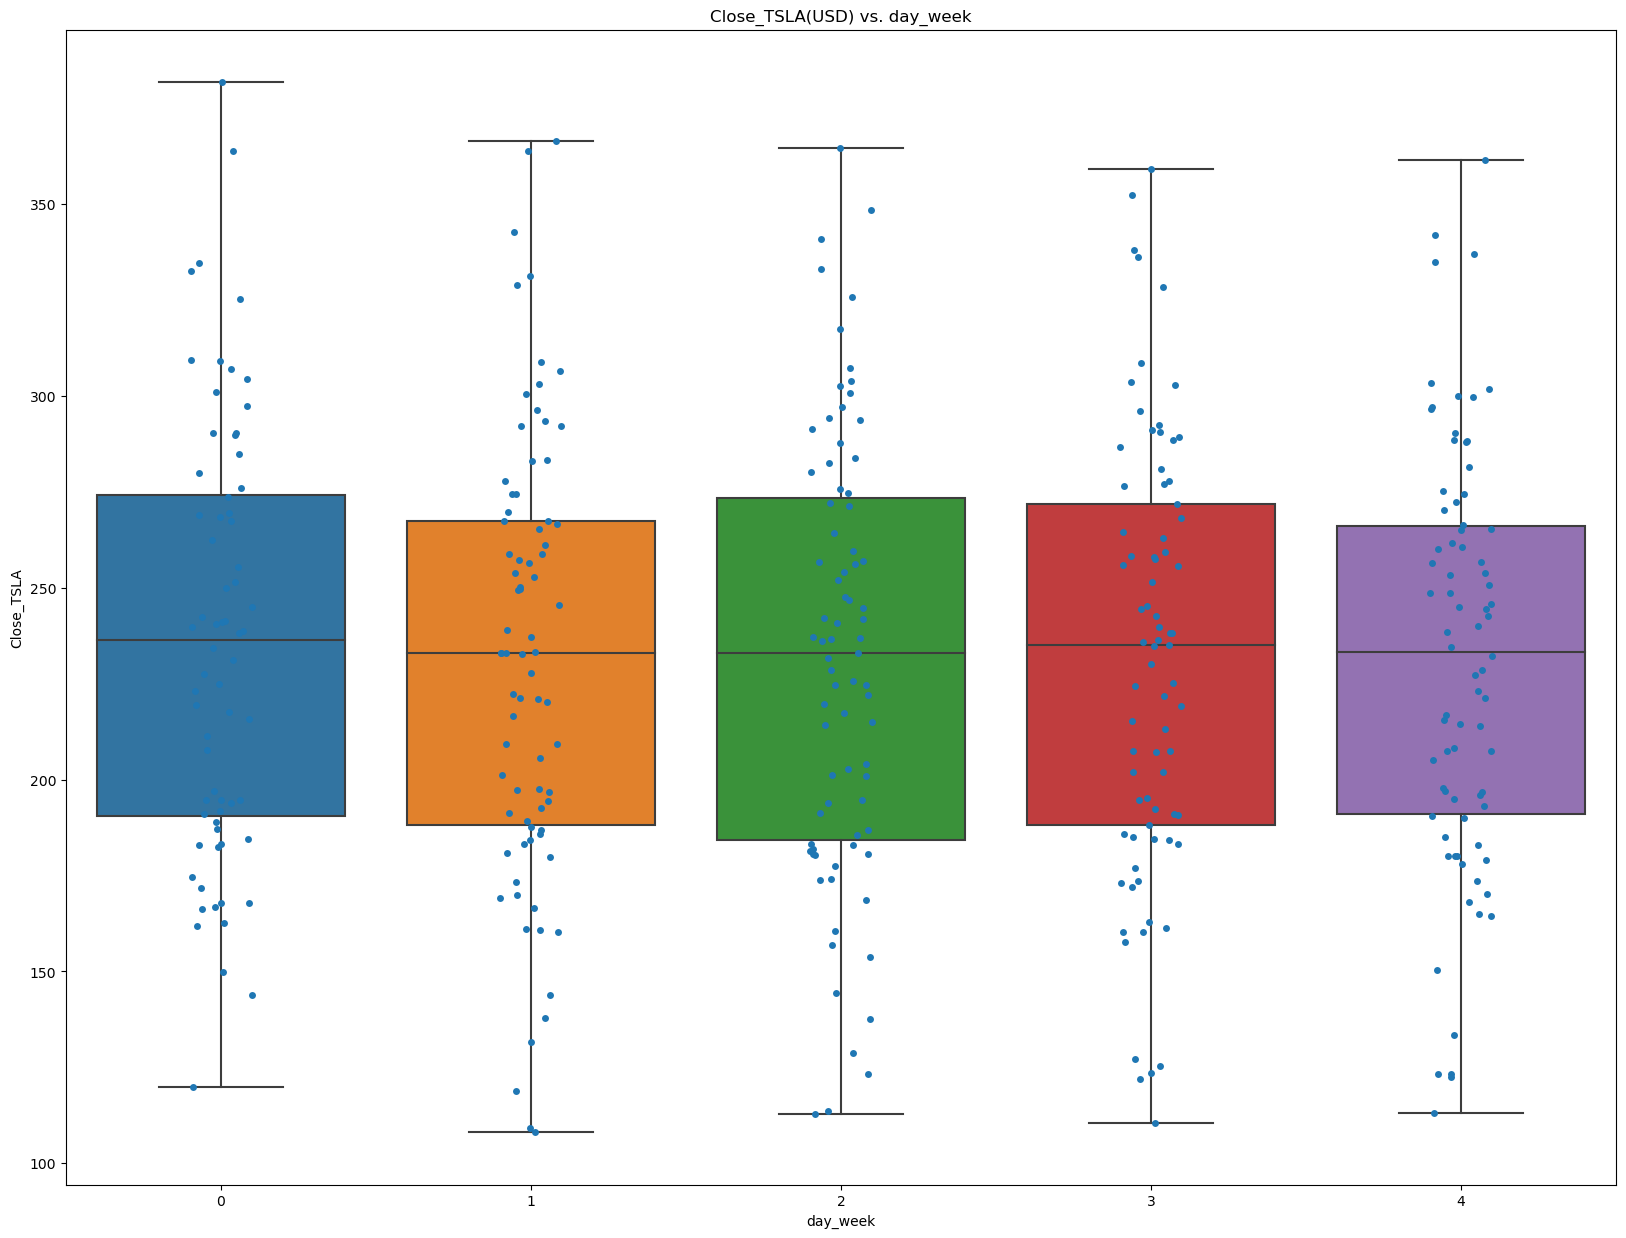

In [21]:
target_y = 'Close_TSLA'
column_x = 'day_week'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

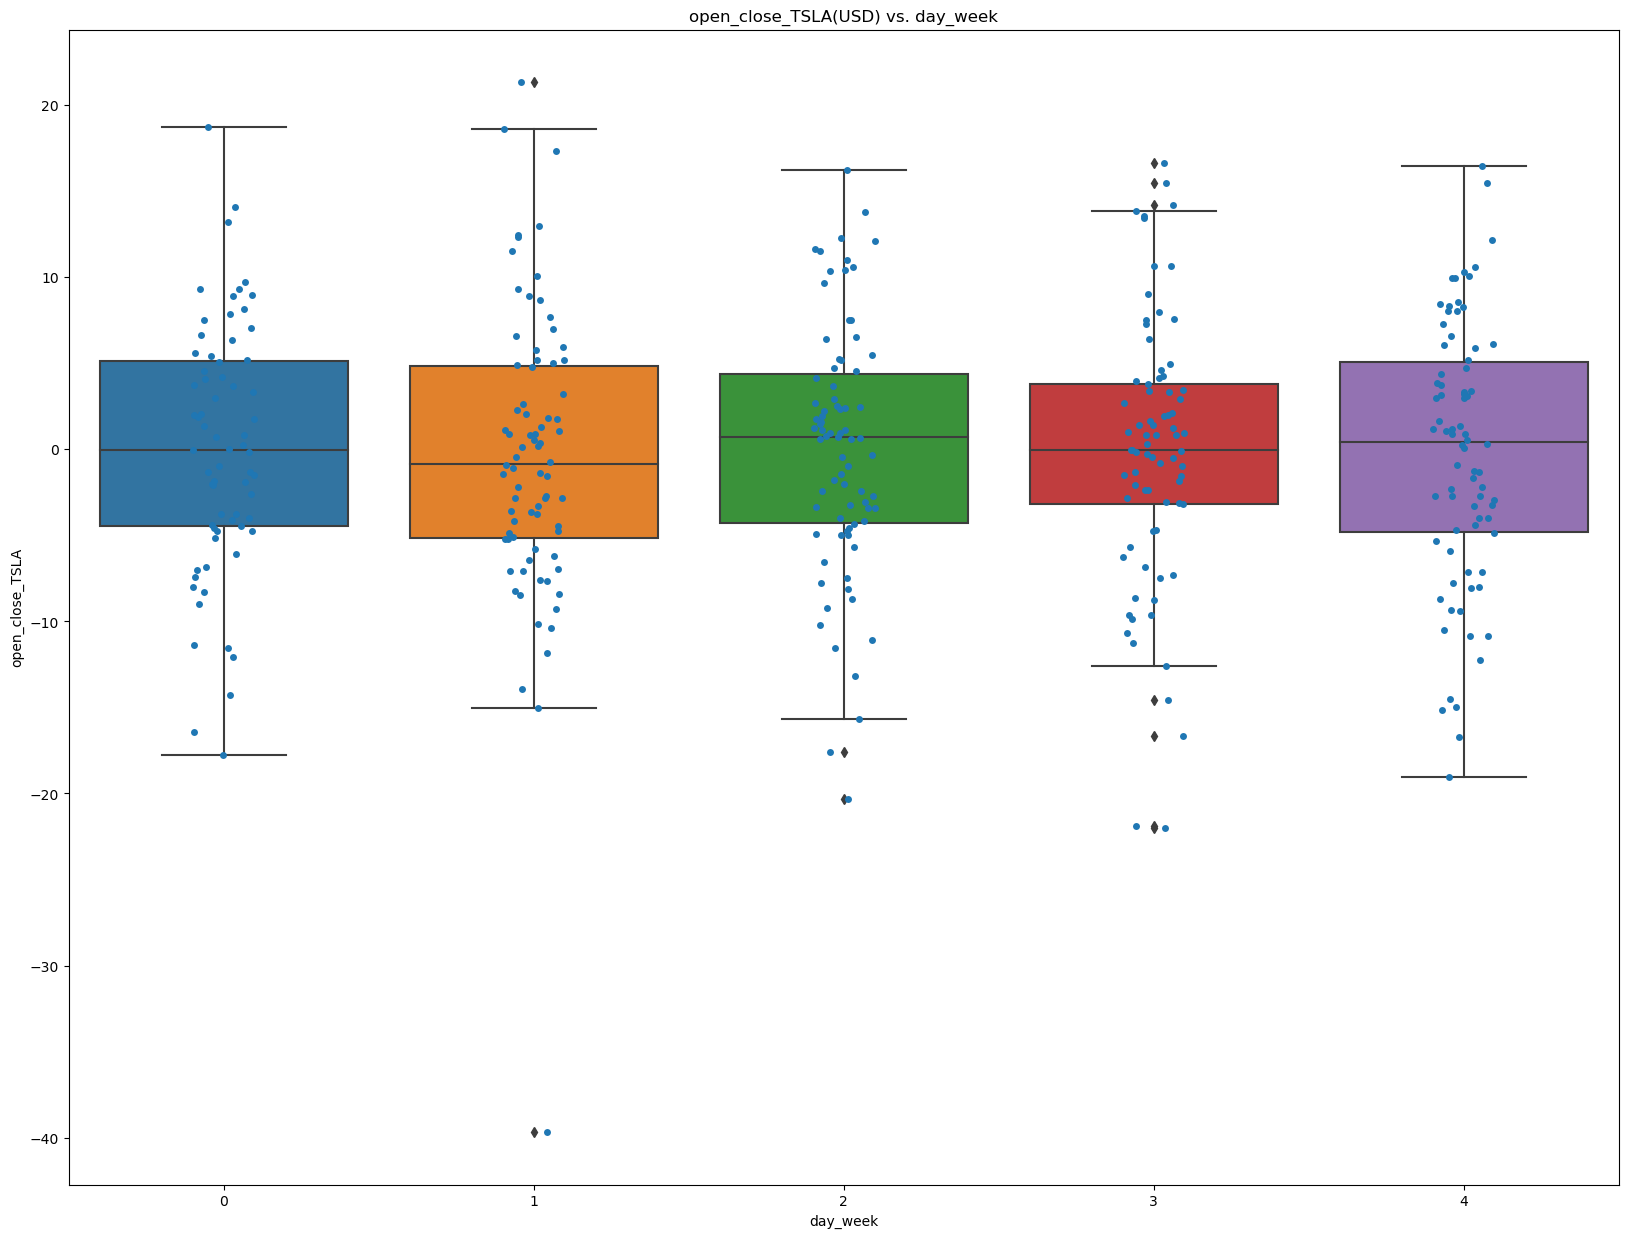

In [22]:
target_y = 'open_close_TSLA'
column_x = 'day_week'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

### Statistics on the open-close TSLA column by day of the week

In [23]:
day_week_stats = df.groupby('day_week').describe().transpose()
day_week_stats.loc['open_close_TSLA']

day_week          0          1          2          3          4
count          68.0       78.0       79.0       77.0       78.0
mean      -0.018677   -0.47393   0.029958   -0.20961  -0.269958
min      -17.759995 -39.669983 -20.333328 -21.983337  -19.01999
25%       -4.479168  -5.168335  -4.269997  -3.179993  -4.812504
50%       -0.025009  -0.834992    0.71666  -0.036667   0.415001
75%        5.107502   4.852505   4.339996    3.76001   5.092506
max       18.690003   21.32666  16.226685  16.599991  16.449982
std        7.253562   8.599311   7.299539   7.823672   7.671168

### Use a FOR loop to run analyze P/E Ratio vs. the 'tesla' variable set (defined above)

In [24]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 16-by-1 grid of subplots to display

# COMMENTING OUT ONLY TO SPEED ANALYSIS. UNCOMMENT FOR FINAL PRODUCT.

#fig, ax = plt.subplots(16,1, figsize=(15,210))

#target = 'pe_ann'

#plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "categorical" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
#for var, subplot in zip(tesla, ax.flatten()):
#    sns.boxplot(x=var, y=target, data=df, ax=subplot)
#plt.show()

### Additional EDA to find other relationships that might serve as predictors

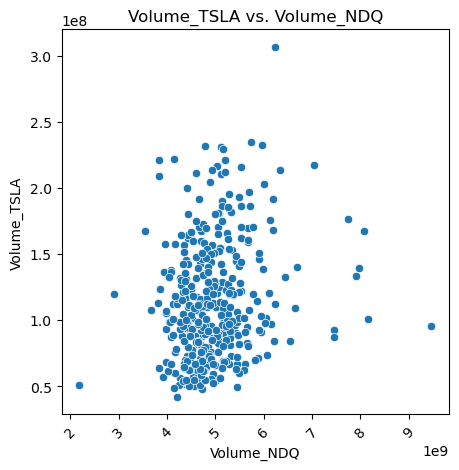

In [25]:
target_y = 'Volume_TSLA'
column_x = 'Volume_NDQ'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

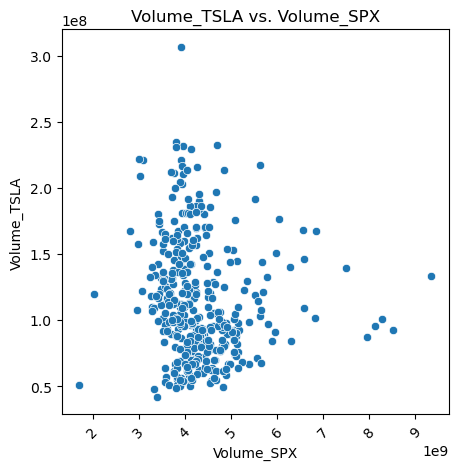

In [26]:
target_y = 'Volume_TSLA'
column_x = 'Volume_SPX'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

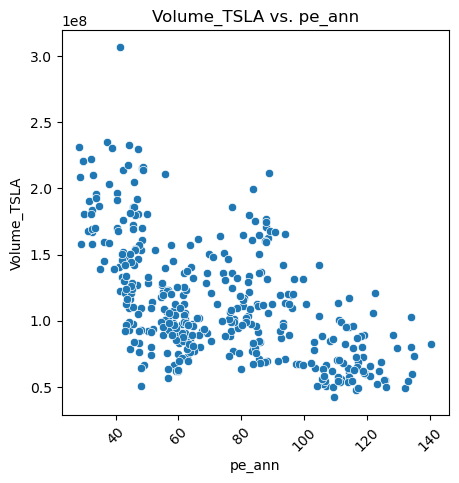

In [27]:
target_y = 'Volume_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

### Investigate TSLA's closing price against the 'nasdaq' variable set (above)

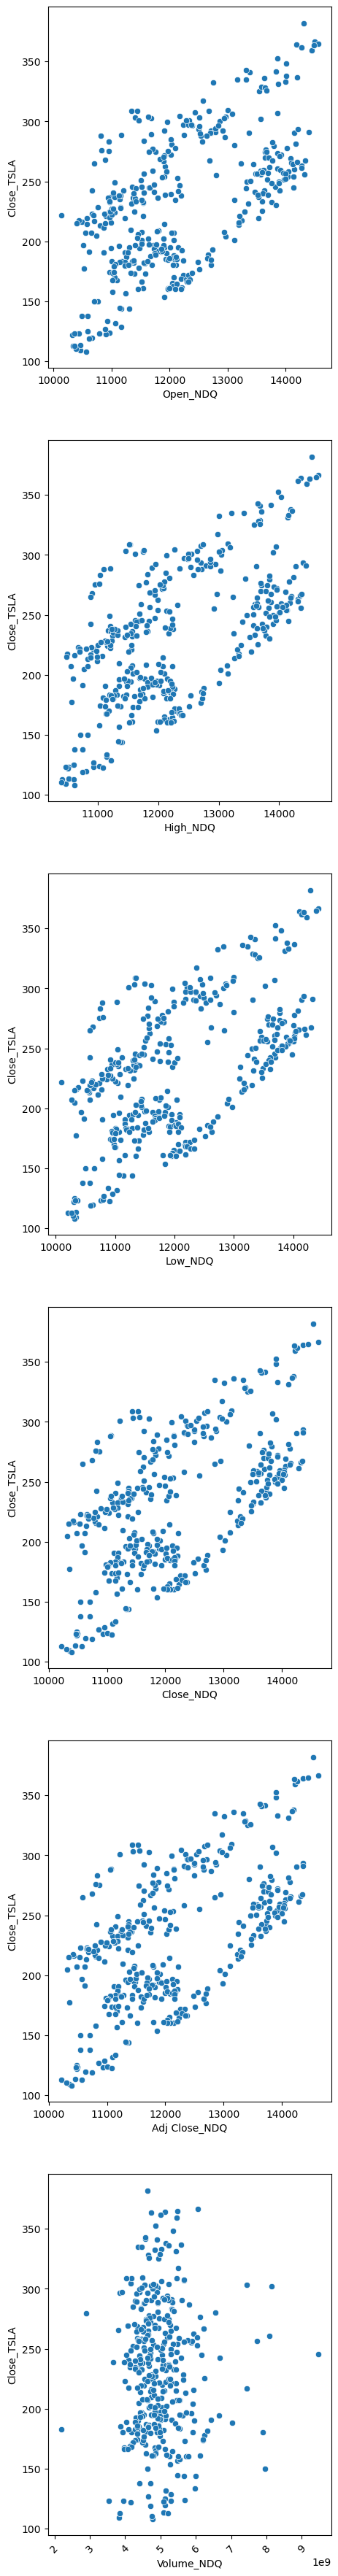

In [28]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 6-by-1 grid of subplots to display
fig, ax = plt.subplots(6,1, figsize=(5,45))

target = 'Close_TSLA'

plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "nominal" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
for var, subplot in zip(nasdaq, ax.flatten()):
    sns.scatterplot(x=var, y=target, data=df, ax=subplot)
plt.show()

### Heatmap of correlation values by feature

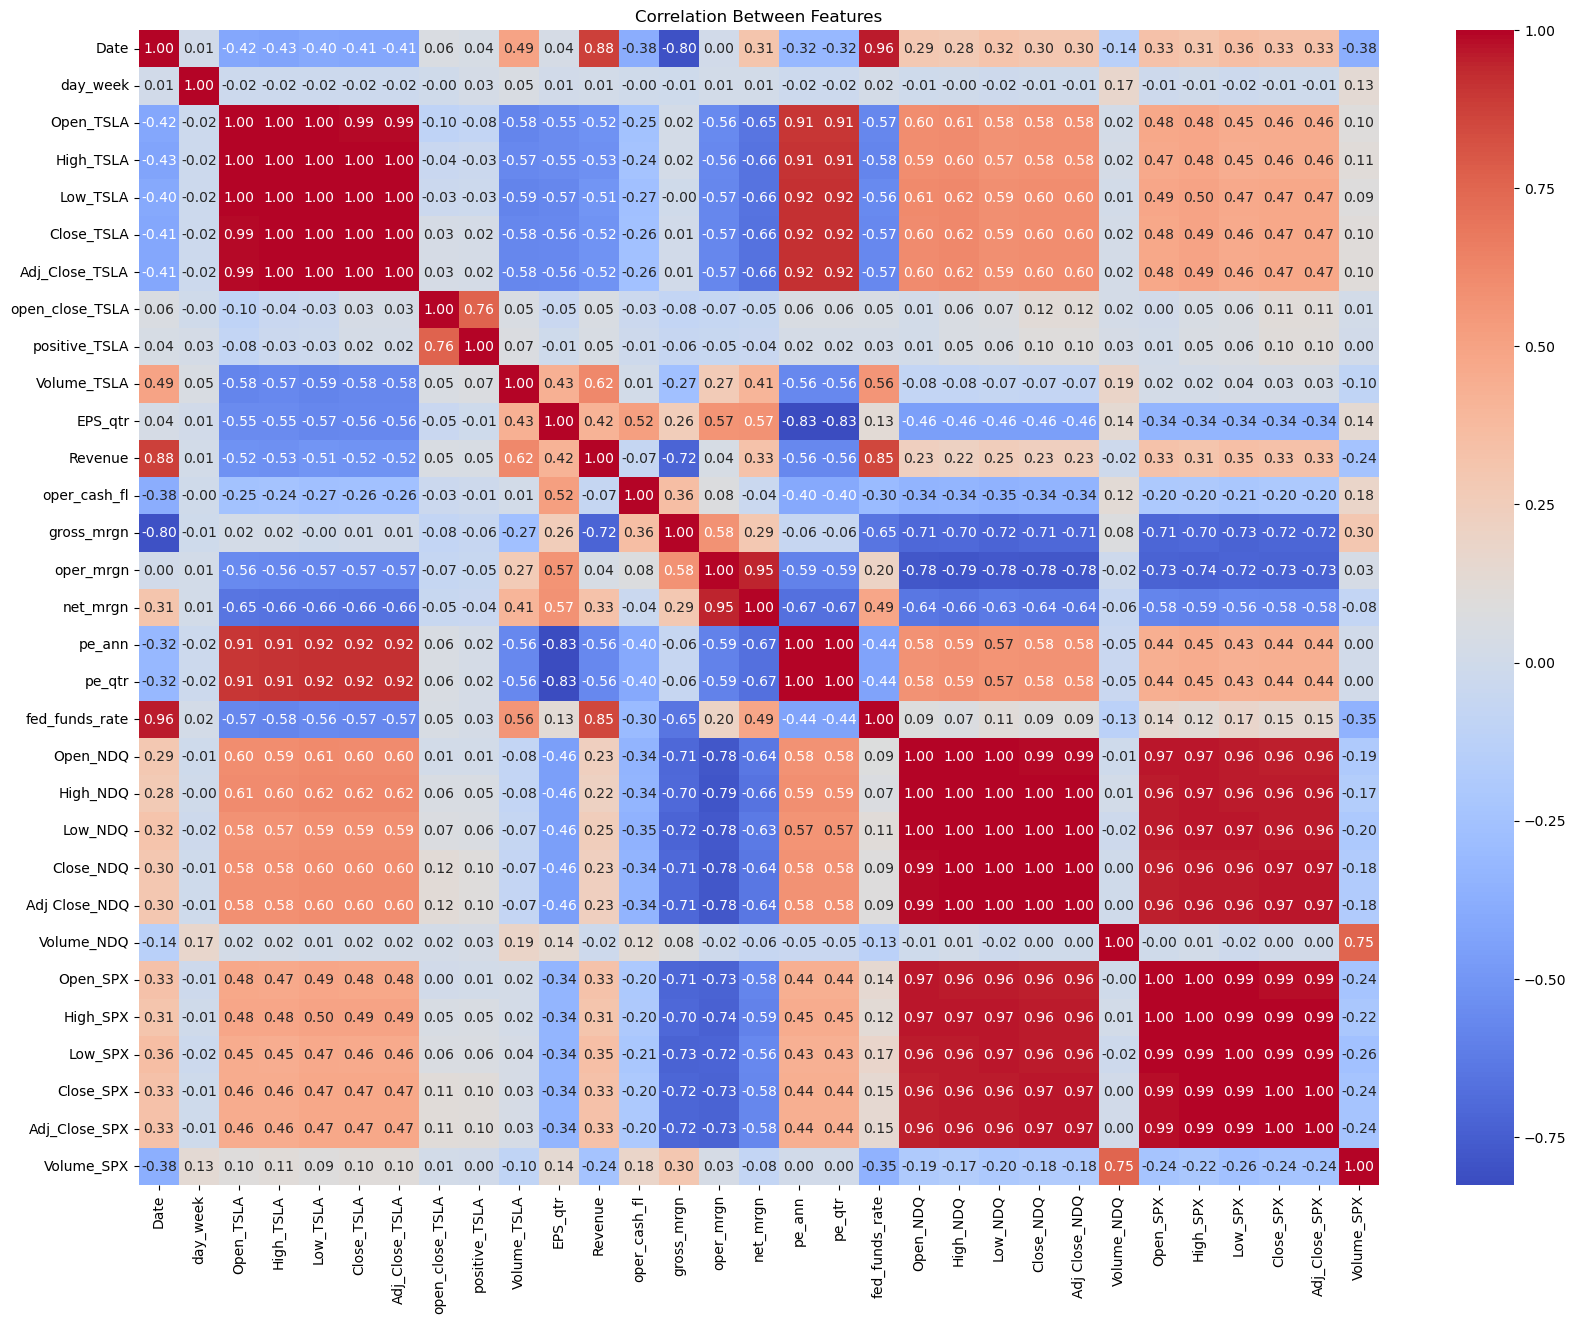

In [29]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws=None)
plt.title('Correlation Between Features')
plt.show()

### Display highest correlations between target and the other features in our dataset



In [30]:
df.corr().abs()['open_close_TSLA'].sort_values(ascending=False)

open_close_TSLA    1.000000
positive_TSLA      0.764211
Adj Close_NDQ      0.115798
Close_NDQ          0.115798
Adj_Close_SPX      0.111286
Close_SPX          0.111286
Open_TSLA          0.102563
gross_mrgn         0.080839
Low_NDQ            0.068830
oper_mrgn          0.067029
Low_SPX            0.061890
Date               0.058596
High_NDQ           0.058220
pe_ann             0.055624
pe_qtr             0.055624
net_mrgn           0.054955
Volume_TSLA        0.053045
Revenue            0.051464
fed_funds_rate     0.050581
High_SPX           0.050329
EPS_qtr            0.048268
High_TSLA          0.042456
oper_cash_fl       0.034188
Adj_Close_TSLA     0.033831
Close_TSLA         0.033831
Low_TSLA           0.028370
Volume_NDQ         0.015990
Volume_SPX         0.010348
Open_NDQ           0.010313
day_week           0.003698
Open_SPX           0.002230
Name: open_close_TSLA, dtype: float64

### Key Variables Visualizations

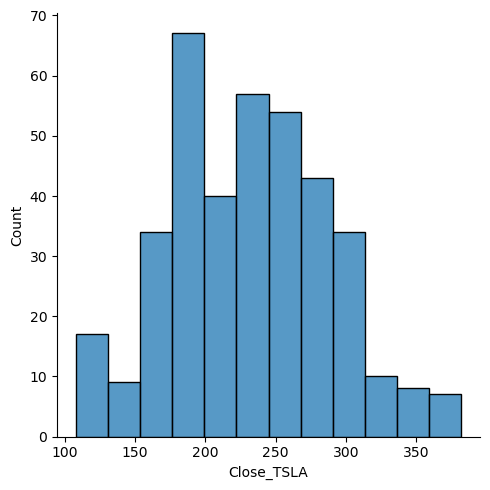

In [31]:
sns.displot(df, x='Close_TSLA')

<Figure size 1200x5600 with 0 Axes>

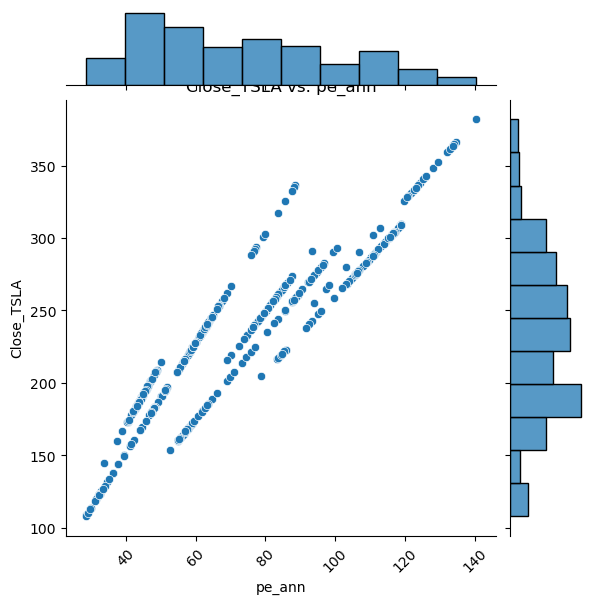

In [32]:
target_y = 'Close_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(12, 56))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

## DISPLOT of variables broken down by US Federal discount rate

<Figure size 1200x5600 with 0 Axes>

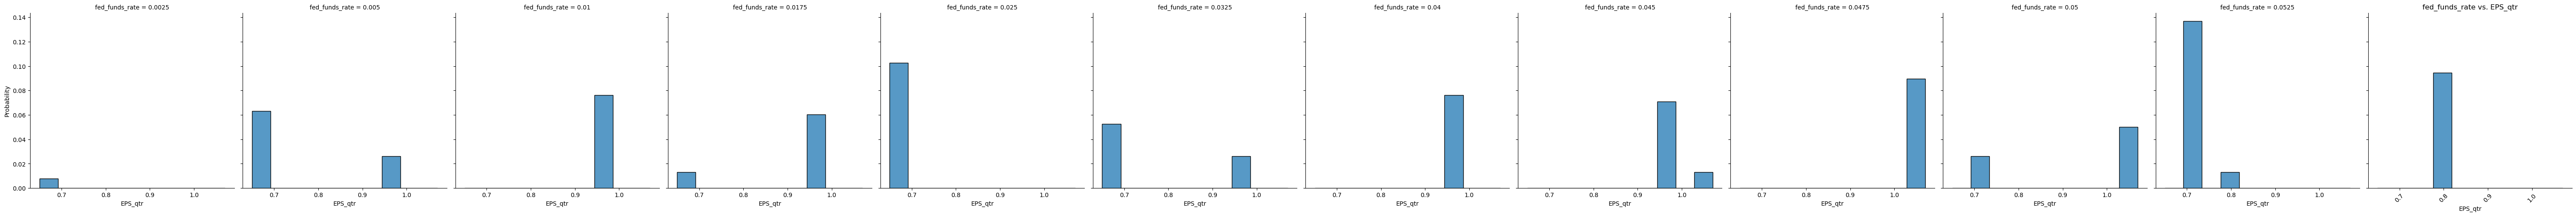

In [33]:
target_y = 'fed_funds_rate'
column_x = 'EPS_qtr'

plt.figure(figsize=(12, 56))
sns.displot(x=column_x, col=target_y, data=df, stat="probability")
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

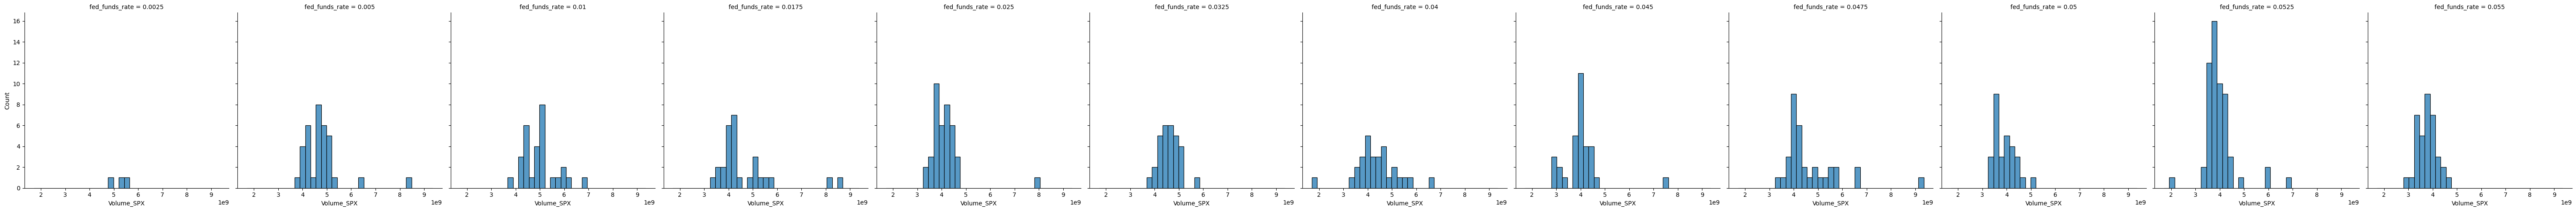

In [34]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_SPX", col="fed_funds_rate")


### S&P 500 vs. TSLA's P/E ratio (annualized EPS)

<Figure size 1e+06x1e+06 with 0 Axes>

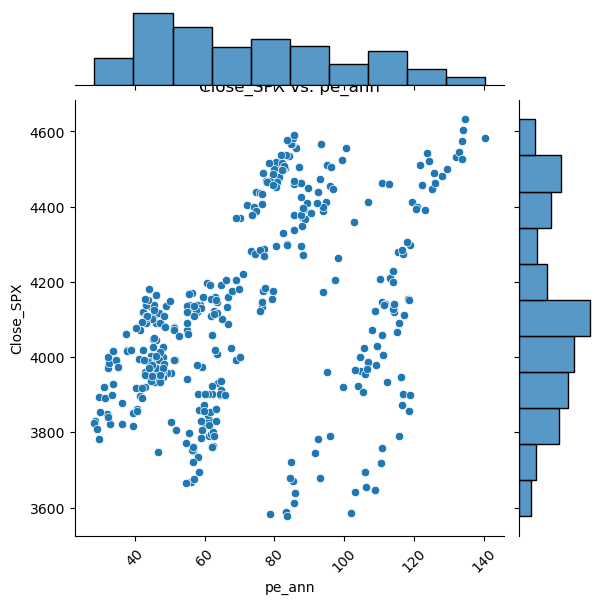

In [35]:
target_y = 'Close_SPX'
column_x = 'pe_ann'

plt.figure(figsize=(10000, 10000))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

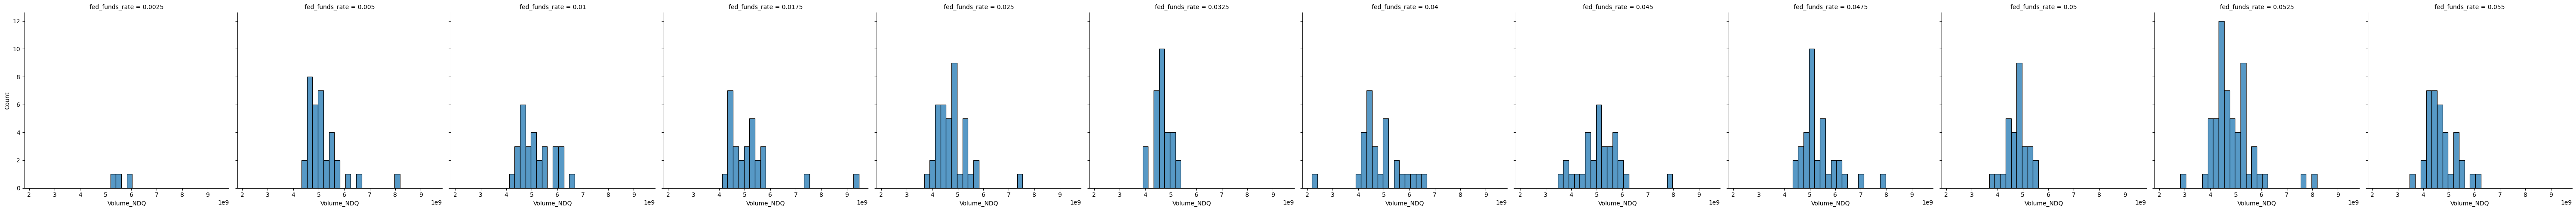

In [36]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_NDQ", col="fed_funds_rate")

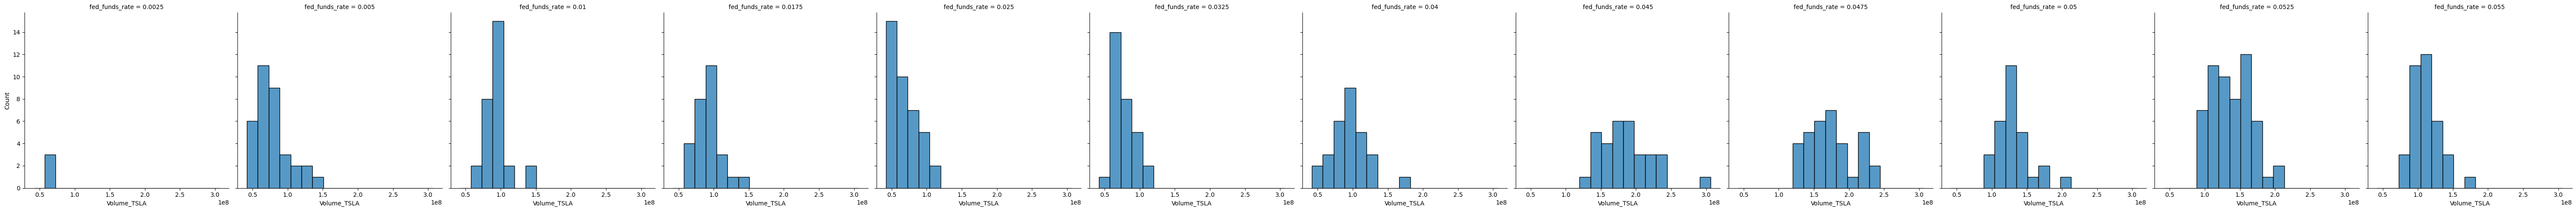

In [37]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_TSLA", col="fed_funds_rate")

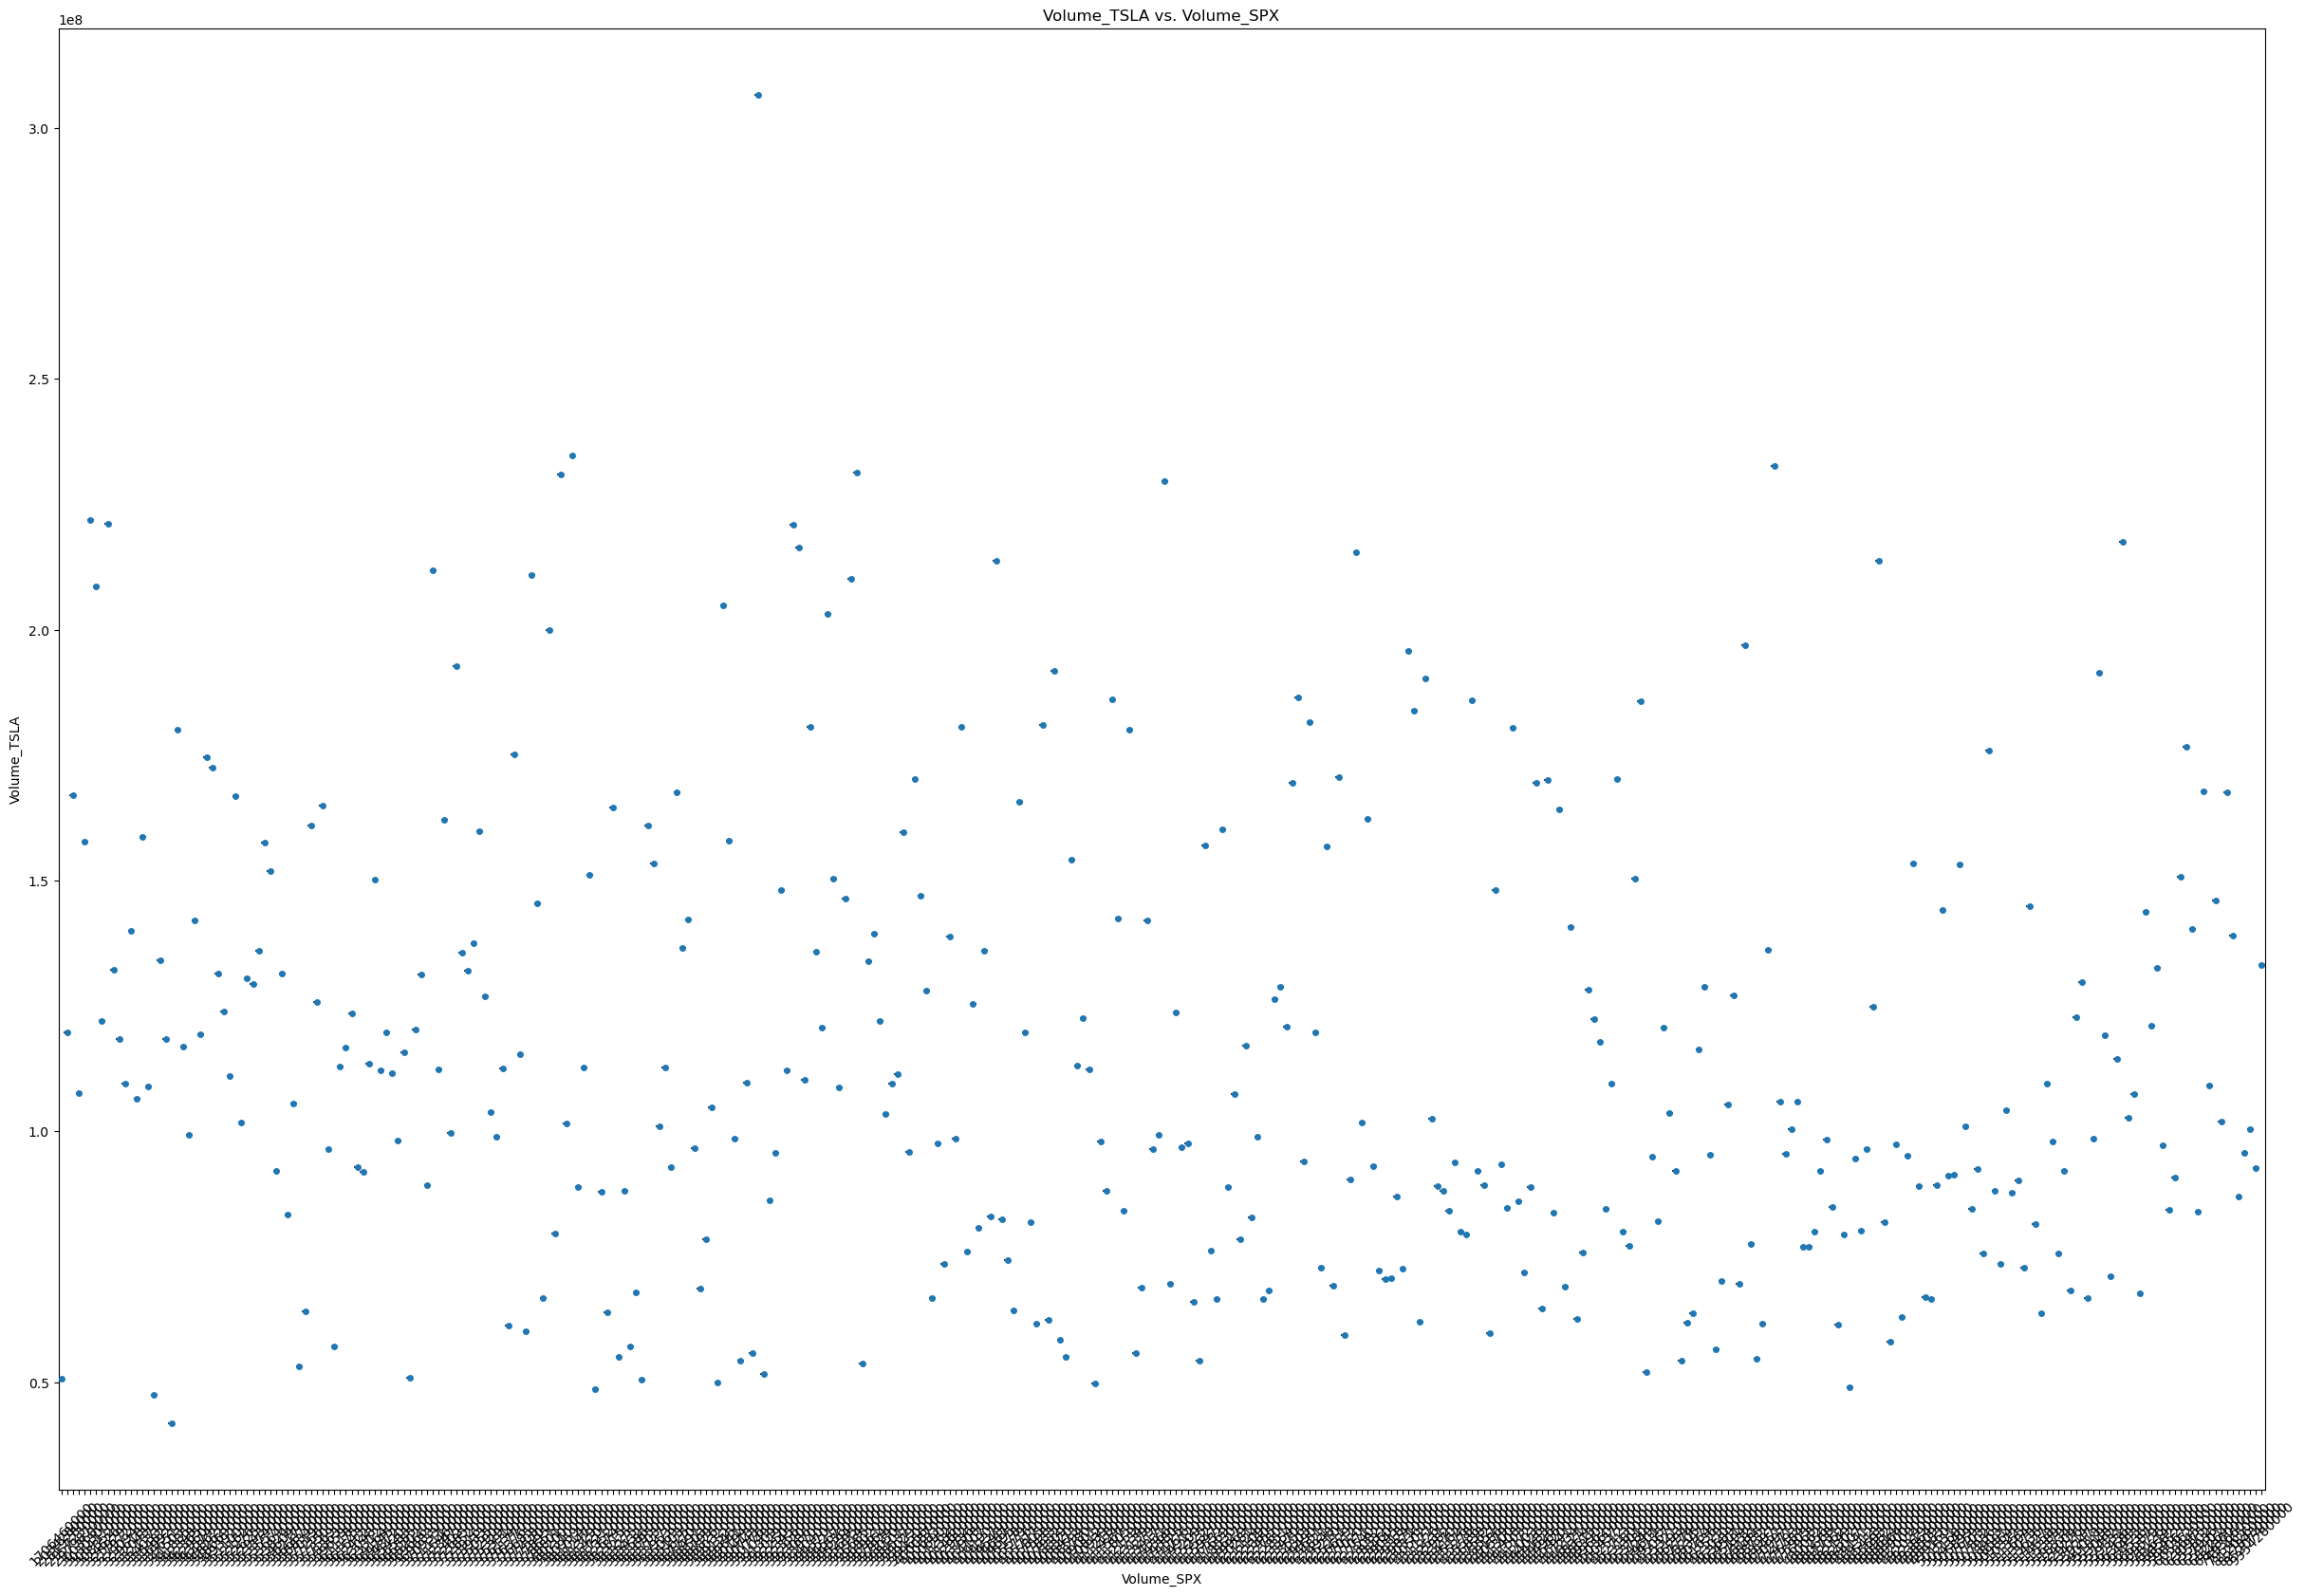

In [38]:
target_y = 'Volume_TSLA'
column_x = 'Volume_SPX'

plt.figure(figsize=(30, 20))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

# Modeling
## Descriptive Modeling
### Linear Regression on Z-score

In [39]:
df_z = df.copy()

df_z = df_z.drop(columns=['Date']) # Drop 'Date' as normalization not logically compatible
df_z = stats.zscore(df_z) # Normalize all columns by z score
df_z['positive_TSLA'] = df['positive_TSLA'] # Reset this column back to original '0' and '1' due to zscore

# Separate normalized 'X' and 'y' into their own variables / dataframes
# Also removing parent variables so as not to influence dervied variables
train_Xz = df_z.drop(columns=['open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', 'Open_TSLA', 'pe_qtr',\
                              'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
train_yz = df_z['open_close_TSLA']

# Print coefficients of the regression model in descending order
lr_full_z = LinearRegression().fit(train_Xz, train_yz)
lr_full_coef_z = pd.DataFrame(zip(train_Xz.columns, lr_full_z.coef_))
lr_full_coef_z.sort_values(by=1, ascending=False)

0         1
15       Close_NDQ  6.261940
18        High_SPX  2.188646
17        Open_SPX  1.412753
14         Low_NDQ  1.205413
10          pe_ann  1.086242
9         net_mrgn  0.935829
3    positive_TSLA  0.879545
5          Revenue  0.724245
2         Low_TSLA  0.401388
7       gross_mrgn  0.360055
6     oper_cash_fl  0.144303
4      Volume_TSLA  0.044493
21      Volume_SPX  0.010116
0         day_week -0.016469
16      Volume_NDQ -0.044904
19         Low_SPX -0.307092
11  fed_funds_rate -0.628038
8        oper_mrgn -0.863743
1        High_TSLA -1.260033
13        High_NDQ -1.406399
20       Close_SPX -3.836303
12        Open_NDQ -5.507196

### Linear Regression on Original Values

In [40]:
# Repeat on original dataframe

# Separate 'X' and 'y' into their own variables / dataframes
# Also removing parent variables so as not to influence training on target derived variable
train_X = df.drop(columns=['Date', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                           'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
train_y = df['open_close_TSLA']

lr_full = LinearRegression().fit(train_X, train_y)
lr_full_coef = pd.DataFrame(zip(train_X.columns, lr_full.coef_))
lr_full_coef.sort_values(by=1, ascending=False)

0             1
9         net_mrgn  5.651790e+02
7       gross_mrgn  1.440692e+02
3    positive_TSLA  6.778632e+00
10          pe_ann  3.073431e-01
18        High_SPX  6.875738e-02
2         Low_TSLA  5.581000e-02
17        Open_SPX  4.348869e-02
15       Close_NDQ  4.255720e-02
14         Low_NDQ  8.150416e-03
4      Volume_TSLA  7.697605e-09
5          Revenue  1.900610e-09
6     oper_cash_fl  1.124875e-09
21      Volume_SPX  9.145767e-11
16      Volume_NDQ -4.625267e-10
19         Low_SPX -9.261090e-03
13        High_NDQ -9.639388e-03
12        Open_NDQ -3.740366e-02
0         day_week -9.107584e-02
20       Close_SPX -1.178575e-01
1        High_TSLA -1.689397e-01
11  fed_funds_rate -2.819160e+02
8        oper_mrgn -4.998646e+02

### Logistic Regression (Cross Validated x5 w/ L2 penalty)

In [41]:
df_lr = df.copy()
# Remove redundant variables (due to target variable being derived by these parent variables)
train_X_lr = df_lr.drop(columns=['Date', 'positive_TSLA','open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                                 'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
# Separate the target variable to train on if TSLA close went up or down (without regard to magnitude)
train_y_lr = df_lr['positive_TSLA']

logit_train = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
logit_train.fit(train_X_lr, train_y_lr)

LogisticRegressionCV(cv=5, max_iter=500)

In [42]:
# Derived from Shmueli (2019)
print('intercept ', logit_train.intercept_[0])
print(pd.DataFrame({'coeff': logit_train.coef_[0]}, index=train_X_lr.columns).sort_values(by='coeff', ascending=False))

intercept  -1.1370680618741833e-17
                       coeff
Volume_TSLA     2.725146e-09
Volume_NDQ      6.656374e-11
Close_NDQ       1.967591e-13
Low_NDQ         3.777325e-14
Close_SPX       2.969175e-14
High_NDQ        1.200492e-14
pe_ann          2.286487e-15
day_week        8.992731e-17
fed_funds_rate -5.321000e-19
net_mrgn       -4.029914e-18
oper_mrgn      -4.201586e-18
gross_mrgn     -5.463537e-18
Low_TSLA       -5.166819e-15
High_TSLA      -6.954278e-15
Low_SPX        -7.876333e-15
High_SPX       -1.551247e-14
Open_SPX       -5.157055e-14
Open_NDQ       -1.437899e-13
Revenue        -8.891385e-12
oper_cash_fl   -4.992309e-11
Volume_SPX     -5.370933e-11


### Logistic Regression on Z-scores (Cross Validated x5 w/ L2 penalty)

In [43]:
df_lr_z = df_z.copy()
train_X_lr_z = df_lr_z.drop(columns=['positive_TSLA','open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                                 'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
train_y_lr_z = df_lr['positive_TSLA']

logit_train_z = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
logit_train_z.fit(train_X_lr_z, train_y_lr_z)

# Derived from Shmueli (2019)
print('intercept ', logit_train_z.intercept_[0])
print(pd.DataFrame({'coeff': logit_train_z.coef_[0]}, index=train_X_lr_z.columns).sort_values(by='coeff', ascending=False))

intercept  0.011756958317908022
                   coeff
Close_NDQ       4.417878
Close_SPX       3.221035
pe_ann          2.452013
Revenue         1.864741
Low_NDQ         0.876479
High_NDQ        0.306331
oper_mrgn       0.295052
Low_SPX         0.181893
oper_cash_fl    0.174230
Volume_NDQ      0.084560
Volume_TSLA     0.081130
net_mrgn        0.043339
day_week        0.019682
High_SPX       -0.018140
gross_mrgn     -0.068353
Low_TSLA       -0.069333
Volume_SPX     -0.075376
fed_funds_rate -1.611292
High_TSLA      -1.751257
Open_SPX       -3.932695
Open_NDQ       -5.304378


## Predictive Model
### [To-Do]: Build model(s) based on previous records' ability to predict future price movement.
#### Can previous data be used to predict future data?

In [44]:
#df = df.drop(columns=[''])

In [45]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
tesla = [
  
]
nasdaq = [
  
]
# Categorical is assumed because original dataset did not have a README file defining these feature names
# Ambiguous on m_dep, n_cores (number or type), and price range (could be basic, low, medium, high)
spx = [
  
]

In [46]:
# Reference: https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/
df_rf = df.copy()

# Column divide into predictors and target
X_rf = df_rf.drop(columns=['Date', 'positive_TSLA', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                                 'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
y_rf = df_rf['positive_TSLA']

# Truncate number of records at the beginning for target and the end for predictors by 'depth_days'
# This is to avoid going outside of index
depth_days = 5
predictors = X_rf.iloc[:-depth_days]
target = y_rf.iloc[depth_days:]#.reset_index(drop=True) #Align indices of target down to predictor indices

#X_subset = pd.DataFrame()

#for i in range([0:depth_days]):
#    if i < depth_days:
#        X_subset.iloc[i] = 0
#    else:
#        X_subset.iloc[i] = df.iloc[i-6:i-1]
#    X_subset.concat([X, x[i]], axis=1)
    
#X_subset

# Split data into training and validation sets
train_df, valid_df, train_y, valid_y = train_test_split(predictors, target, test_size=0.4, random_state=14)

rf_train = RandomForestClassifier(n_estimators=100, min_samples_split=128, criterion='gini', random_state=14)
rf_train.fit(train_df, train_y)

rf_train_pred = rf_train.predict(valid_df[predictors.columns])
rf_train_pred = pd.Series(rf_train_pred, index=valid_df.index)
precision = precision_score(valid_y, rf_train_pred)
print("Precision =", precision)

Precision = 0.46846846846846846


In [47]:
# Referencing from Schmueli's (2019) example using param_grid as default values

# COMMENTING OUT ONLY FOR SPEED OF RUNNING DURING DEVELOPMENT. UNCOMMENT ON FINAL.

#param_grid = {
#    'n_estimators': [100, 200],
#    'criterion': ["gini", "entropy", "log_loss"],
#    'max_depth': [1, 3, 5, 10],
#    'min_samples_split': [2, 4, 8, 16, 32, 64, 128], 
#    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
#}

#grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1) # CV with 5 folds and all CPUs
#grid_search.fit(X_rf, y_rf)

#rf = grid_search.best_estimator_
#rf

In [48]:
rf_cv = RandomForestClassifier(criterion='log_loss', max_depth=10, min_impurity_decrease=0.005, \
                               min_samples_split=16, random_state=14)
rf_cv.fit(train_df, train_y)

rf_cv_pred = rf_cv.predict(valid_df[predictors.columns])
rf_cv_pred = pd.Series(rf_cv_pred, index=valid_df.index)
precision = precision_score(valid_y, rf_cv_pred)
print("Precision =", precision)

Precision = 0.4942528735632184


In [49]:
pd.DataFrame(zip(rf_cv.feature_names_in_, rf_cv.feature_importances_)).sort_values(by=1, ascending=False)

0         1
20      Volume_SPX  0.088571
19       Close_SPX  0.087354
2         Low_TSLA  0.080716
3      Volume_TSLA  0.078400
1        High_TSLA  0.072128
15      Volume_NDQ  0.069923
17        High_SPX  0.064106
16        Open_SPX  0.060368
12        High_NDQ  0.057556
9           pe_ann  0.051776
18         Low_SPX  0.050937
14       Close_NDQ  0.047648
11        Open_NDQ  0.046431
13         Low_NDQ  0.044266
0         day_week  0.026728
10  fed_funds_rate  0.024439
7        oper_mrgn  0.013600
6       gross_mrgn  0.009903
5     oper_cash_fl  0.009397
4          Revenue  0.008661
8         net_mrgn  0.007092

### Predictive Model #2: Use trailing n days (depth_days) to predict if the next day will be positive or not
#### Not using index shift like above

In [50]:
depth_days = 7
prediction_index = 14
X_rf.iloc[prediction_index]

day_week          3.000000e+00
High_TSLA         3.677133e+02
Low_TSLA          3.588800e+02
Volume_TSLA       4.899270e+07
Revenue           1.771900e+10
oper_cash_fl      4.585000e+09
gross_mrgn        2.528000e-01
oper_mrgn         1.212000e-01
net_mrgn          1.026000e-01
pe_ann            1.320588e+02
fed_funds_rate    5.000000e-03
Open_NDQ          1.444478e+04
High_NDQ          1.445674e+04
Low_NDQ           1.421772e+04
Close_NDQ         1.422052e+04
Volume_NDQ        5.453890e+09
Open_SPX          4.599020e+03
High_SPX          4.603070e+03
Low_SPX           4.530410e+03
Close_SPX         4.530410e+03
Volume_SPX        4.823020e+09
Name: 14, dtype: float64

In [51]:
X_rf.iloc[prediction_index-depth_days:prediction_index]

day_week   High_TSLA    Low_TSLA  Volume_TSLA      Revenue  oper_cash_fl  \
7          1  332.619995  307.250000    105868500  17719000000    4585000000   
8          2  346.899994  325.466675    120676200  17719000000    4585000000   
9          3  341.496674  329.600006     68920800  17719000000    4585000000   
10         4  340.600006  332.440002     62031600  17719000000    4585000000   
11         0  365.959991  351.200012    102506100  17719000000    4585000000   
12         1  371.589996  357.703339     73614900  17719000000    4585000000   
13         2  371.316681  361.333344     59865000  17719000000    4585000000   

    gross_mrgn  oper_mrgn  net_mrgn      pe_ann  ...     Open_NDQ  \
7       0.2528     0.1212    0.1026  121.811272  ...  13866.42969   
8       0.2528     0.1212    0.1026  122.439957  ...  13990.34961   
9       0.2528     0.1212    0.1026  124.254900  ...  14001.32031   
10      0.2528     0.1212    0.1026  123.852943  ...  14194.71973   
11      0.2528     0.1212    0.1026  133.803917  ...  14177.20996   
12      0.2528     0.1212    0.1026  134.751230  ...  14500.38965   
13      0.2528     0.1212    0.1026  134.067401  ...  14558.58984   

       High_NDQ      Low_NDQ    Close_NDQ  Volume_NDQ     Open_SPX  \
7   14141.07031  13857.29004  14108.82031  5445100000  4469.100098   
8   14152.13965  13921.65039  13922.59961  5024230000  4493.100098   
9   14193.54981  13897.20020  14191.83984  5149520000  4469.979980   
10  14218.75977  14010.79004  14169.29981  5585100000  4522.910156   
11  14356.00000  14101.33984  14354.90039  5129500000  4541.089844   
12  14646.90039  14419.40039  14619.63965  6060890000  4602.859863   
13  14609.25000  14383.45020  14442.26953  5479200000  4624.200195   

       High_SPX      Low_SPX    Close_SPX  Volume_SPX  
7   4522.000000  4469.100098  4511.609863  4754840000  
8   4501.069824  4455.810059  4456.240234  4550670000  
9   4520.580078  4465.169922  4520.160156  4131390000  
10  4546.029785  4501.069824  4543.060059  4305020000  
11  4575.649902  4517.689941  4575.520020  4312260000  
12  4637.299805  4589.660156  4631.600098  5085910000  
13  4627.770020  4581.319824  4602.450195  4385570000  

[7 rows x 21 columns]

In [52]:
predictors = X_rf.iloc[prediction_index-depth_days:prediction_index]
target = y_rf.iloc[prediction_index]

In [53]:
target

0

In [54]:
# User-defined: How many previous days do you want to use for the prediction?
depth_days = 10
prediction_index = 200 #To-Do: Find a way to iterate through for all prediction indices
prediction_index_values = X_rf.index.values # Array of index values in X_rf

# Find a way to partition training set as the set of all depth_days long trailing records with target
# positive_TSLA value of next record
# Goal: Training set[previous n-records from index-1 to index-depth_days]
#       Target set['positive_TSLA'].iloc[<index>]

X_subset = pd.DataFrame()
for x in prediction_index_values:
    if x < depth_days:
        break
    else:
        X_subset.concat([X_subset],axis=1)

predictor_index_range = prediction_index_values[prediction_index-depth_days:prediction_index]
predictors = X_rf.iloc[predictor_index_range]
target = y_rf.iloc[prediction_index]

rf_train = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, \
                                                        min_samples_split=8, random_state=14)
#rf_train.fit(predictors, target)

# Split data into training and validation sets
#train_df, valid_df, train_y, valid_y = train_test_split(predictors, target, test_size=0.4, random_state=1)

#rf_train_pred = rf_train.predict(valid_df[predictors.columns])
#rf_train_pred = pd.Series(rf_train_pred, index=valid_df.index)
#precision = precision_score(valid_y, rf_train_pred)
#print("Precision =", precision)

### A priori model: Train on known positive_TSLA = 1 for intraday

In [55]:
X_z = df_z.drop(columns=['positive_TSLA', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                         'pe_qtr', 'EPS_qtr', 'Close_NDQ', 'Adj Close_NDQ', 'Close_SPX', 'Adj_Close_SPX'])
y_z = df_z['positive_TSLA']

pos_train_df, pos_valid_df, pos_train_y, pos_valid_y = train_test_split(X_z, y_z, test_size=0.4, random_state=1)

rf_train = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, \
                                                        min_samples_split=8, random_state=14)
rf_train.fit(pos_train_df, pos_train_y)

rf_train_pred = rf_train.predict(pos_valid_df[X_z.columns])
rf_train_pred = pd.Series(rf_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, rf_train_pred)
print("Precision =", precision)

Precision = 0.5106382978723404


In [56]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

#print(confusion_matrix(pos_valid_y, nn_train_pred))
#print(classification_report(pos_valid_y, nn_train_pred))

Precision = 0.7674418604651163


In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

#print(confusion_matrix(pos_valid_y, nn_train_pred))
#print(classification_report(pos_valid_y, nn_train_pred))

Precision = 0.9027777777777778


Precision = 0.9264705882352942
              precision    recall  f1-score   support

           0       0.86      0.94      0.89        77
           1       0.93      0.84      0.88        75

    accuracy                           0.89       152
   macro avg       0.89      0.89      0.89       152
weighted avg       0.89      0.89      0.89       152



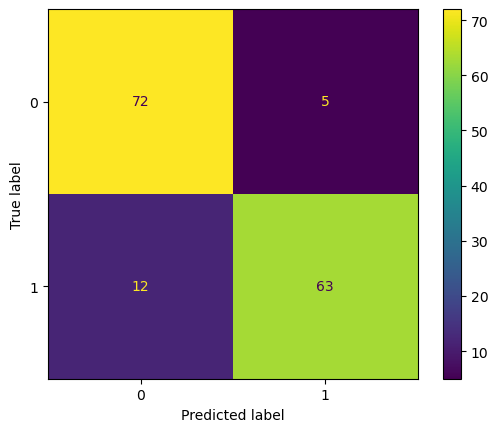

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='identity', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
#            #sklearn.metrics.ConfusionMatrixDisplay
cm = confusion_matrix(pos_valid_y, nn_train_pred, labels=mlp.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
cmd.plot()
print(classification_report(pos_valid_y, nn_train_pred))

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='identity', solver='lbfgs', max_iter=500, random_state=17)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

#print(confusion_matrix(pos_valid_y, nn_train_pred))
#print(classification_report(pos_valid_y, nn_train_pred))

Precision = 0.9264705882352942


In [60]:
# Referencing directly from Schmueli's (2019) use of DecisionTreeRegressor and using param_grid as default values
param_grid = {
    'hidden_layer_sizes': [1, 2, 4, 8, 16],
    'activation': ["relu"],
    'solver': ['lbfgs'],
    'max_iter': [500, 1000, 2000], 
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1) # CV with 5 folds and all CPUs
grid_search.fit(X_z, y_z)

rf = grid_search.best_estimator_

In [61]:
rf

MLPClassifier(hidden_layer_sizes=2, max_iter=1000, solver='lbfgs')

In [62]:
df_z

day_week  Open_TSLA  High_TSLA  Low_TSLA  Close_TSLA  Adj_Close_TSLA  \
0    1.399212   0.851029   0.765022  0.692522    0.592949        0.592949   
1   -1.470966   0.499909   0.515090  0.465625    0.421384        0.421384   
2   -0.753422   0.468444   0.543331  0.468812    0.631666        0.631666   
3   -0.035877   0.667190   0.754584  0.743579    0.858643        0.858643   
4    0.681667   0.796761   0.945947  0.884660    1.044357        1.044357   
..        ...        ...        ...       ...         ...             ...   
375  1.399212   0.341112   0.334512  0.369225    0.297831        0.297831   
376  1.399212   0.341112   0.334512  0.369225    0.297831        0.297831   
377 -1.470966   0.571794   0.653393  0.620718    0.743260        0.743260   
378 -0.753422   0.686517   0.714978  0.728785    0.634923        0.634923   
379 -0.035877   0.674320   0.655655  0.755847    0.702767        0.702767   

     open_close_TSLA  positive_TSLA  Volume_TSLA   EPS_qtr  ...   Low_NDQ  \
0          -1.914854              0    -1.063300 -1.098417  ...  0.671700   
1          -0.590944              0    -0.970924 -1.098417  ...  0.430418   
2           1.176285              1    -1.067698 -1.098417  ...  0.484146   
3           1.375674              1    -0.681867 -1.098417  ...  0.813678   
4           1.781364              1    -1.073496 -1.098417  ...  1.098755   
..               ...            ...          ...       ...  ...       ...   
375        -0.327978              0     0.088979 -0.430152  ...  1.463756   
376        -0.327978              0     0.088979 -0.430152  ...  1.526880   
377         1.232945              1     1.352817 -0.430152  ...  1.490524   
378        -0.400639              0     0.484790 -0.430152  ...  1.464318   
379         0.184542              1    -0.061289 -0.430152  ...  1.531731   

     Close_NDQ  Adj Close_NDQ  Volume_NDQ  Open_SPX  High_SPX   Low_SPX  \
0     0.584786       0.584786    0.438344  0.695679  0.638680  0.487960   
1     0.353229       0.353229    1.224872  0.389127  0.461609  0.336253   
2     0.677210       0.677210    0.641344  0.333488  0.557319  0.438694   
3     1.107476       1.107476    2.127676  0.730190  0.915417  0.689479   
4     1.264644       1.264644    0.871208  0.957736  1.134596  1.016839   
..         ...            ...         ...       ...       ...       ...   
375   1.394051       1.394051   -1.069024  1.381877  1.382676  1.457951   
376   1.531932       1.531932   -0.563147  1.500424  1.452951  1.534295   
377   1.404703       1.404703   -0.487475  1.469629  1.438032  1.491017   
378   1.439958       1.439958   -0.160273  1.427211  1.406564  1.478065   
379   1.539128       1.539128   -0.415945  1.527584  1.539450  1.576555   

     Close_SPX  Adj_Close_SPX  Volume_SPX  
0     0.390177       0.390177    0.733463  
1     0.265806       0.265806    1.479890  
2     0.621936       0.621936    1.265856  
3     1.002259       1.002259    2.341927  
4     1.216757       1.216757    0.787954  
..         ...            ...         ...  
375   1.399407       1.399407   -1.236601  
376   1.518872       1.518872   -1.106820  
377   1.416985       1.416985   -1.029606  
378   1.439068       1.439068   -0.919697  
379   1.589190       1.589190   -0.779756  

[380 rows x 30 columns]

In [63]:
df_z2 = df_z.copy()
df_z2

day_week  Open_TSLA  High_TSLA  Low_TSLA  Close_TSLA  Adj_Close_TSLA  \
0    1.399212   0.851029   0.765022  0.692522    0.592949        0.592949   
1   -1.470966   0.499909   0.515090  0.465625    0.421384        0.421384   
2   -0.753422   0.468444   0.543331  0.468812    0.631666        0.631666   
3   -0.035877   0.667190   0.754584  0.743579    0.858643        0.858643   
4    0.681667   0.796761   0.945947  0.884660    1.044357        1.044357   
..        ...        ...        ...       ...         ...             ...   
375  1.399212   0.341112   0.334512  0.369225    0.297831        0.297831   
376  1.399212   0.341112   0.334512  0.369225    0.297831        0.297831   
377 -1.470966   0.571794   0.653393  0.620718    0.743260        0.743260   
378 -0.753422   0.686517   0.714978  0.728785    0.634923        0.634923   
379 -0.035877   0.674320   0.655655  0.755847    0.702767        0.702767   

     open_close_TSLA  positive_TSLA  Volume_TSLA   EPS_qtr  ...   Low_NDQ  \
0          -1.914854              0    -1.063300 -1.098417  ...  0.671700   
1          -0.590944              0    -0.970924 -1.098417  ...  0.430418   
2           1.176285              1    -1.067698 -1.098417  ...  0.484146   
3           1.375674              1    -0.681867 -1.098417  ...  0.813678   
4           1.781364              1    -1.073496 -1.098417  ...  1.098755   
..               ...            ...          ...       ...  ...       ...   
375        -0.327978              0     0.088979 -0.430152  ...  1.463756   
376        -0.327978              0     0.088979 -0.430152  ...  1.526880   
377         1.232945              1     1.352817 -0.430152  ...  1.490524   
378        -0.400639              0     0.484790 -0.430152  ...  1.464318   
379         0.184542              1    -0.061289 -0.430152  ...  1.531731   

     Close_NDQ  Adj Close_NDQ  Volume_NDQ  Open_SPX  High_SPX   Low_SPX  \
0     0.584786       0.584786    0.438344  0.695679  0.638680  0.487960   
1     0.353229       0.353229    1.224872  0.389127  0.461609  0.336253   
2     0.677210       0.677210    0.641344  0.333488  0.557319  0.438694   
3     1.107476       1.107476    2.127676  0.730190  0.915417  0.689479   
4     1.264644       1.264644    0.871208  0.957736  1.134596  1.016839   
..         ...            ...         ...       ...       ...       ...   
375   1.394051       1.394051   -1.069024  1.381877  1.382676  1.457951   
376   1.531932       1.531932   -0.563147  1.500424  1.452951  1.534295   
377   1.404703       1.404703   -0.487475  1.469629  1.438032  1.491017   
378   1.439958       1.439958   -0.160273  1.427211  1.406564  1.478065   
379   1.539128       1.539128   -0.415945  1.527584  1.539450  1.576555   

     Close_SPX  Adj_Close_SPX  Volume_SPX  
0     0.390177       0.390177    0.733463  
1     0.265806       0.265806    1.479890  
2     0.621936       0.621936    1.265856  
3     1.002259       1.002259    2.341927  
4     1.216757       1.216757    0.787954  
..         ...            ...         ...  
375   1.399407       1.399407   -1.236601  
376   1.518872       1.518872   -1.106820  
377   1.416985       1.416985   -1.029606  
378   1.439068       1.439068   -0.919697  
379   1.589190       1.589190   -0.779756  

[380 rows x 30 columns]

## Predict record value at i given previous n records
Branch: LONG MEMORY - Prediction based on all available records to predict i

Build master copy with shifted previous rows as columns

In [216]:
# Reference: chat.openai.com assisted as an initial starting point, which has since greatly evolved manually

df_z2 = df_z.copy()

depth_days = 5 # User-defined: Number of days deep to begin slicing the original dataframe

# Replicate column values for original row of dataframe as column values shifted in the same row
# Purpose: Trading space efficiency withing dataframe for simplicity of data access in a 2D dataframe
for i in range(1, depth_days+1):
    for col in df_z2.columns:
        lag_col_name = f'{col}_lag{i}'
        df_z2[lag_col_name] = df_z2[col].shift(i)
        
df_z2 = df_z2.dropna() # Drop missing rows for training purposes (this set specific to depth_days size)

Train Test Split on similar parameters to above

In [221]:
# Drop these columns because they are a posteriori relative to target varible
X_z = df_z2.drop(columns=['positive_TSLA', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                         'pe_qtr', 'EPS_qtr', 'Close_NDQ', 'Adj Close_NDQ', 'Close_SPX', 'Adj_Close_SPX'])
y_z = df_z2['positive_TSLA'] 

train_df, valid_df, train_y, valid_y = train_test_split(X_z, y_z, test_size=0.4, random_state=1)

((219, 950), (146, 950))

Apply MLPClassifier and compare to Identity NN above

Precision = 0.5606060606060606
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        76
           1       0.56      0.53      0.54        70

    accuracy                           0.58       146
   macro avg       0.57      0.57      0.57       146
weighted avg       0.57      0.58      0.57       146



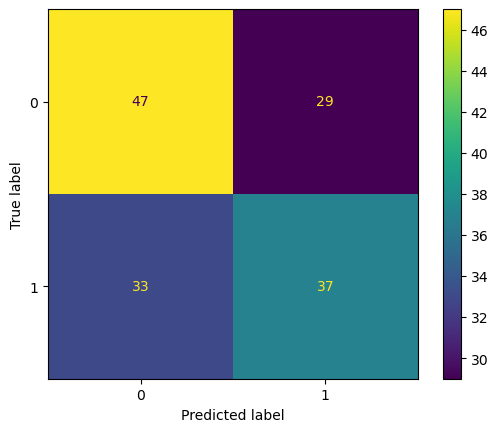

In [311]:
mlp2 = MLPClassifier(hidden_layer_sizes=(4,6,4), activation='logistic', solver='lbfgs', \
                     max_iter=2000, random_state=1220) #4,6,4,log,lb,2000 = .583 precision
mlp2.fit(train_df, train_y)

nn_train_pred2 = mlp2.predict(valid_df[X_z.columns])
nn_train_pred2 = pd.Series(nn_train_pred2, index=valid_df.index)
precision = precision_score(valid_y, nn_train_pred2)
print("Precision =", precision)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
#            #sklearn.metrics.ConfusionMatrixDisplay
cm = confusion_matrix(valid_y, nn_train_pred2, labels=mlp2.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp2.classes_)
cmd.plot()
print(classification_report(valid_y, nn_train_pred2))

Cross-validate across these parameters

In [301]:
param_grid = {
    'hidden_layer_sizes': [1, 2, 4, 8, 16],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [500, 1000, 2000, 4000], 
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1) # CV with 5 folds and all CPUs
grid_search.fit(X_z, y_z)

rf = grid_search.best_estimator_

/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarn

/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWar

/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWar

/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWar

/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWa

/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/johnvincent/Library/r-miniconda-arm64/envs/r-reticulate/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWar

In [302]:
rf

MLPClassifier(activation='logistic', hidden_layer_sizes=1, max_iter=4000,
              solver='sgd')

Branch: SHORT MEMORY - Prediction based on record i given previous n records

In [324]:
# Reference: chat.openai.com assisted as an initial starting point, which has since greatly evolved manually

df_z3 = df_z.copy()

depth_days = 10 # User-defined: Number of days deep to begin slicing the original dataframe

# Replicate column values for original row of dataframe as column values shifted in the same row
# Purpose: Trading space efficiency withing dataframe for simplicity of data access in a 2D dataframe
for i in range(1, depth_days+1):
    for col in df_z3.columns:
        lag_col_name = f'{col}_lag{i}'
        df_z3[lag_col_name] = df_z3[col].shift(i)

In [325]:
df_z3.shape

(380, 30720)

In [326]:
pd.set_option('display.max_columns', None)

prediction_index=17 # User-defined: Which day / index do we want to predict for?

local_predictors = df_z3.iloc[prediction_index-depth_days:prediction_index+1] # Retrieve record + n previous

# Drop col with missing previous days as they are key to performing a "trailing" time-series analysis
local_predictors = local_predictors.dropna(axis=1)
local_predictors

day_week  Open_TSLA  High_TSLA  Low_TSLA  Close_TSLA  Adj_Close_TSLA  \
7  -0.753422   1.380155   1.658399  1.462157    1.768861        1.768861   
8  -0.035877   1.674415   1.906823  1.790807    1.799232        1.799232   
9   0.681667   1.849945   1.812823  1.865377    1.886908        1.886908   
10  1.399212   1.839752   1.797224  1.916613    1.867491        1.867491   
11 -1.470966   2.176200   2.238404  2.255065    2.348204        2.348204   
12 -0.753422   2.428919   2.336347  2.372393    2.393967        2.393967   
13 -0.035877   2.329812   2.331592  2.437882    2.360932        2.360932   
14  0.681667   2.349845   2.268906  2.393621    2.263902        2.263902   
15  1.399212   2.270771   2.220253  2.333484    2.305283        2.305283   
16 -1.470966   2.319265   2.540120  2.368905    2.665582        2.665582   
17 -0.753422   2.595730   2.557285  2.457727    2.344770        2.344770   

    open_close_TSLA  positive_TSLA  Volume_TSLA   EPS_qtr   Revenue  \
7          2.792138              1    -0.191606 -1.098417 -1.152927   
8          0.854070              1     0.140801 -1.098417 -1.152927   
9          0.206170              1    -1.021015 -1.098417 -1.152927   
10         0.139132              1    -1.175665 -1.098417 -1.152927   
11         1.181477              1    -0.267085 -1.098417 -1.152927   
12        -0.339220              0    -0.915641 -1.098417 -1.152927   
13         0.146917              1    -1.224301 -1.098417 -1.152927   
14        -0.709016              0    -1.468365 -1.098417 -1.152927   
15         0.173732              1    -1.350054 -1.098417 -1.152927   
16         2.450025              1    -0.726604 -1.098417 -1.152927   
17        -1.923071              0    -0.770621 -1.098417 -1.152927   

    oper_cash_fl  gross_mrgn  oper_mrgn  net_mrgn    pe_ann    pe_qtr  \
7       1.097041   -0.064173  -2.412691 -2.862955  1.806732  1.806732   
8       1.097041   -0.064173  -2.412691 -2.862955  1.829813  1.829813   
9       1.097041   -0.064173  -2.412691 -2.862955  1.896443  1.896443   
10      1.097041   -0.064173  -2.412691 -2.862955  1.881687  1.881687   
11      1.097041   -0.064173  -2.412691 -2.862955  2.247011  2.247011   
12      1.097041   -0.064173  -2.412691 -2.862955  2.281789  2.281789   
13      1.097041   -0.064173  -2.412691 -2.862955  2.256684  2.256684   
14      1.097041   -0.064173  -2.412691 -2.862955  2.182944  2.182944   
15      1.097041   -0.064173  -2.412691 -2.862955  2.214393  2.214393   
16      1.097041   -0.064173  -2.412691 -2.862955  2.488206  2.488206   
17      1.097041   -0.064173  -2.412691 -2.862955  2.244401  2.244401   

    fed_funds_rate  Open_NDQ  High_NDQ   Low_NDQ  Close_NDQ  Adj Close_NDQ  \
7        -1.784866  1.489778  1.648860  1.572641   1.700298       1.700298   
8        -1.784866  1.598983  1.658704  1.629106   1.536085       1.536085   
9        -1.784866  1.608651  1.695531  1.607655   1.773507       1.773507   
10       -1.784866  1.779084  1.717950  1.707310   1.753630       1.753630   
11       -1.784866  1.763654  1.840000  1.786752   1.917297       1.917297   
12       -1.784866  2.048456  2.098703  2.065793   2.150749       2.150749   
13       -1.784866  2.099745  2.065220  2.034254   1.994341       1.994341   
14       -1.784866  1.999450  1.929590  1.888854   1.798797       1.798797   
15       -1.784866  1.845011  1.796371  1.813483   1.834934       1.834934   
16       -1.784866  1.875696  1.998637  1.949153   2.073952       2.073952   
17       -1.784866  2.039529  1.968320  1.846217   1.784379       1.784379   

    Volume_NDQ  Open_SPX  High_SPX   Low_SPX  Close_SPX  Adj_Close_SPX  \
7     0.648027  1.452974  1.580252  1.539029   1.615139       1.615139   
8     0.085535  1.548834  1.494936  1.487026   1.394424       1.394424   
9     0.252985  1.456488  1.574464  1.523651   1.649222       1.649222   
10    0.835136  1.667900  1.678203  1.664127   1.740506       1.740506   
11    0.226228  1.740513  1.798942  1.729161   1.86989

Precision = 0.9927007299270073
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       159
           1       0.99      0.82      0.90       166

    accuracy                           0.90       325
   macro avg       0.92      0.91      0.90       325
weighted avg       0.92      0.90      0.90       325



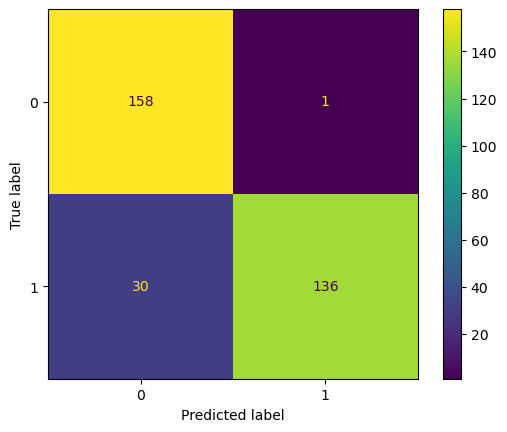

In [338]:
# Drop these columns because they are a posteriori relative to target varible
X_z = df_z3.drop(columns=['positive_TSLA', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                         'pe_qtr', 'EPS_qtr', 'Close_NDQ', 'Adj Close_NDQ', 'Close_SPX', 'Adj_Close_SPX'])
y_z = df_z3['positive_TSLA']

X_z = X_z.dropna()
y_z = y_z.dropna()
y_z = y_z.iloc[X_z.index]

mlp3 = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='lbfgs', \
                     max_iter=2000, random_state=1220) #4,6,4,log,lb,2000 = .583 precision
mlp3.fit(X_z, y_z)

nn_train_pred3 = mlp3.predict(X_z)
nn_train_pred3 = pd.Series(nn_train_pred3, index=X_z.index)
precision = precision_score(y_z, nn_train_pred3)
print("Precision =", precision)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
#            #sklearn.metrics.ConfusionMatrixDisplay
cm = confusion_matrix(y_z, nn_train_pred3, labels=mlp3.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp3.classes_)
cmd.plot()
print(classification_report(y_z, nn_train_pred3))

Conclusion: Using just the past n days, we can predict whether the next day will be a positive or a negative day based on 31 parallel factors. This is similar to technical analysis where mathematical models (moving averages, bollinger bands, etc.) are applied to a single vertical (price), but in this case it tracks 31 variables simultaneously over the past n days. With n=10, precision = .8054 which we can treat as a buy signal that is correct 80.54% of the time.

hidden_layer_sizes=(5,5,5), activation='relu', solver='lbfgs', max_iter=2000, random_state=1220
Precision = 0.9927007299270073
Accuracy = 0.92

Prepare variables

In [199]:
y = local_predictors['positive_TSLA'] # target variable
X = local_predictors.drop(columns=['positive_TSLA']) # Keep previous positive_TSLA lags to act as a memory
local_predictors_col = [X.columns] # THIS is the X argument to pass to a model's .predict(X, y)

day_week  Open_TSLA  High_TSLA  Low_TSLA  Close_TSLA  Adj_Close_TSLA  \
9   0.681667   1.849945   1.812823  1.865377    1.886908        1.886908   
10  1.399212   1.839752   1.797224  1.916613    1.867491        1.867491   
11 -1.470966   2.176200   2.238404  2.255065    2.348204        2.348204   
12 -0.753422   2.428919   2.336347  2.372393    2.393967        2.393967   
13 -0.035877   2.329812   2.331592  2.437882    2.360932        2.360932   
14  0.681667   2.349845   2.268906  2.393621    2.263902        2.263902   

    open_close_TSLA  Volume_TSLA   EPS_qtr   Revenue  oper_cash_fl  \
9          0.206170    -1.021015 -1.098417 -1.152927      1.097041   
10         0.139132    -1.175665 -1.098417 -1.152927      1.097041   
11         1.181477    -0.267085 -1.098417 -1.152927      1.097041   
12        -0.339220    -0.915641 -1.098417 -1.152927      1.097041   
13         0.146917    -1.224301 -1.098417 -1.152927      1.097041   
14        -0.709016    -1.468365 -1.098417 -1.152927      1.097041   

    gross_mrgn  oper_mrgn  net_mrgn    pe_ann    pe_qtr  fed_funds_rate  \
9    -0.064173  -2.412691 -2.862955  1.896443  1.896443       -1.784866   
10   -0.064173  -2.412691 -2.862955  1.881687  1.881687       -1.784866   
11   -0.064173  -2.412691 -2.862955  2.247011  2.247011       -1.784866   
12   -0.064173  -2.412691 -2.862955  2.281789  2.281789       -1.784866   
13   -0.064173  -2.412691 -2.862955  2.256684  2.256684       -1.784866   
14   -0.064173  -2.412691 -2.862955  2.182944  2.182944       -1.784866   

    Open_NDQ  High_NDQ   Low_NDQ  Close_NDQ  Adj Close_NDQ  Volume_NDQ  \
9   1.608651  1.695531  1.607655   1.773507       1.773507    0.252985   
10  1.779084  1.717950  1.707310   1.753630       1.753630    0.835136   
11  1.763654  1.840000  1.786752   1.917297       1.917297    0.226228   
12  2.048456  2.098703  2.065793   2.150749       2.150749    1.471028   
13  2.099745  2.065220  2.034254   1.994341       1.994341    0.693601   
14  1.999450  1.929590  1.888854   1.798797       1.798797    0.659775   

    Open_SPX  High_SPX   Low_SPX  Close_SPX  Adj_Close_SPX  Volume_SPX  \
9   1.456488  1.574464  1.523651   1.649222       1.649222   -0.213531   
10  1.667900  1.678203  1.664127   1.740506       1.740506   -0.009844   
11  1.740513  1.798942  1.729161   1.869899       1.869899   -0.001350   
12  1.987233  2.050242  2.010781   2.093446       2.093446    0.906227   
13  2.072470  2.011396  1.978145   1.977248       1.977248    0.084651   
14  1.971896  1.910712  1.778936   1.690081       1.690081    0.597828   

    day_week_lag1  Open_TSLA_lag1  High_TSLA_lag1  Low_TSLA_lag1  \
9       -0.035877        1.674415        1.906823       1.790807   
10       0.681667        1.849945        1.812823       1.865377   
11       1.399212        1.839752        1.797224       1.916613   
12      -1.470966        2.176200        2.238404       2.255065   
13      -0.753422        2.428919        2.336347       2.372393   
14      -0.035877        2.329812        2.331592       2.437882   

    Close_TSLA_lag1  Adj_Close_TSLA_lag1  open_close_TSLA_lag1  \
9          1.799232             1.799232              0.854070   
10         1.886908             1.886908              0.206170   
11         1.867491             1.867491              0.139132   
12         2.348204             2.348204              1.181477   
13         2.393967             2.393967             -0.339220   
14         2.360932             2.360932              0.146917   

    positive_TSLA_lag1  Volume_TSLA_lag1  EPS_qtr_lag1  Revenue_lag1  \
9                  1.0          0.140801     -1.098417     -1.152927   
10                 1.0         -1.021015     -1.098417     -1.152927   
11                 1.0         -1.175665     -1.098417     -1.152927   
12                 1.0         -0.267085     -1.098417     -1.152927   
13                 0.0         -0.915641     -1.098417     -1.152927   
14                 1.0         -1.224301    